# Data EDA


## 메타데이터 확인



- 소코핑 데이터 세트에는 600명의 아프리카 피험자에 속하는 6,000개의 지문이 포함
- 피험자 한 명당 지문이 10개이고 모든 피험자가 18세 이상입니다. 데이터셋에는 성별, 손 및 손가락 이름 레이블과 같은 고유 속성이 포함되어 있습니다. 
- 추가로 지문을 합성으로 STRANGY Tool을 사용하여 obliteration, central rotation,  z-cut 세 가지 다른 noise 데이터가 추가됨

=> **분류를 위한 benchmark로서 활용을 하기 위함**


### Data count 
- Total Count=55,270   
- gt_iamges count : 6000 easy_images count :17931 medium_images count : 17067 hard_images count : 14272  
- total :  55270  
왜 굳이 이렇게 altered 한지는 모르겠다.. 

### data size
width = 96, height = 103 chnnel = 1 (grayscale)

### altered 
- obliteration 
Fingerprint 분야에서 "obliteration"은 지문 이미지를 완전히 손상시키는 기술을 의미합니다. 이 기술은 지문 보안 및 개인 정보 보호를 위해 사용될 수 있습니다. 지문 이미지를 완전히 지우거나 지문의 미세한 세부 사항을 모두 제거하여 해독을 방지할 수 있습니다. Obliteration 기술은 지문 인식 기술 개발 및 성능 평가에 중요한 역할을 합니다.
- central rotation 
Fingerprint 분야에서 "central rotation"은 지문 이미지를 회전시키는 기술을 의미합니다. 이 기술은 지문 이미지의 방향성을 변경하여 지문 인식 성능을 향상시키는 데 사용됩니다. Central rotation은 지문 이미지의 회전 각도를 중심 축 주변으로 변경하므로써 지문 이미지의 정보를 유지한 채로 지문 인식 기술의 성능을 개선할 수 있습니다. 이 기술은 지문 이미지의 회전 변형을 인식하는 능력을 강화하는 데 도움이 됩니다. 따라서 central rotation은 지문 인식 기술에서 중요한 역할을 합니다.
- z-cut 
Fingerprint 분야에서 "z-cut"은 지문 이미지에서 일부분을 잘라내는 기술을 의미합니다. 이 기술은 지문 이미지의 일부를 제거하여 지문 인식의 성능을 평가하고 개선하는 데 사용됩니다. Z-cut 기술은 지문 이미지에서 지문 끝부분을 제거하여 지문 인식의 정확도를 높이는 데 도움이 됩니다. 지문 이미지에서 양 끝의 일부를 제거함으로써 지문 이미지의 일부 변형을 인식하는 능력을 강화합니다. 따라서 z-cut은 지문 인식 기술에서 중요한 역할을 합니다.


### 이미지 구분방법 

1. Identifies the number of the subject: 001 to 600.
2. Indicates the gender of the subject: M – male, F – female.
3. Denotes the hand: Left or Right.
4. Indicates the finger name: little, ring, middle, index, or thumb.
5. Indicates the type of alteration type (altered images only): Obl – obliteration, CR – central rotation, or Zcut.
6. File extension: “.bmp” for all images. 


## Data Load 및 이미지 검토와 전처리 

#### Data Load 및 개수확인

In [1]:
import os 
# import cv2
# import matplotlib as plt
# import matplotlib.pyplot as plt
import natsort
import numpy as np
import sys
%matplotlib inline

In [2]:
lib_path = '.\\lib'
sys.path.insert(0,lib_path)

In [3]:
from lib.fingerprint_segmentation import *
from lib.utils import *
from lib.image_processing import *

In [4]:
#Data path 
#gt path
gt_path1= './data/SOCOFing/Real/'
gt_path2  ='./data/socofing/SOCOFing/Real/'


gt_file_path1=[gt_path1+i for i in os.listdir(gt_path1)]
gt_file_path2=[gt_path2+i for i in os.listdir(gt_path2)]


#natsort는 문자열을 sort할때 사용하는 라이브러리!
#두 데이터의 비교를 위하여 sort해줌
gt_file_path1 = natsort.natsorted(gt_file_path1)
gt_file_path2 = natsort.natsorted(gt_file_path2)
gt_file_path = gt_file_path1 #밑에 보면 알지만 위의 파일들의 차이가 없기 떄문에 하나의 경로로 묶어준다.


In [5]:
import glob
altered_path = "./data/socofing/SOCOFing/Altered/"
img_type = ["Altered-Easy","Altered-Medium","Altered-Hard"]
noise_type= ["CR", "Obl","Zcut"]
file_type = ['path','images']

altered_images_dict = {}
gt_images_dict = {}

for itype in img_type:
    altered_images_dict[itype] = {}
    for ntype in noise_type:
        altered_images_dict[itype][ntype] = {}
        img_path = os.path.join(altered_path, itype, '*_' + ntype + '.bmp')
        file_list = glob.glob(img_path)
        file_list = natsort.natsorted(file_list)
        imgs_list = [cv2.imread(i,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for i in file_list]
        altered_images_dict[itype][ntype]['path'] = file_list
        altered_images_dict[itype][ntype]['images']= imgs_list


for itype in img_type:
    gt_images_dict[itype] = {}
    for ntype in noise_type:
        gt_images_dict[itype][ntype] = {'path':[],'images':[]}
        for altered_path in altered_images_dict[itype][ntype]['path']:
            # parse the file name of altered image to get the corresponding ground truth image file name
            gt_file_name = altered_path.split('/')[-1].replace("_"+ntype,"").split('\\')[-1]
            gt_fpath = os.path.join(gt_path1, gt_file_name)
            img = cv2.imread(gt_fpath,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4]
            gt_images_dict[itype][ntype]['path'].append(gt_fpath)
            gt_images_dict[itype][ntype]['images'].append(img)

In [6]:
sum = 0
for itype in img_type :
    for ntype in noise_type :
        sum+= len(gt_images_dict[itype][ntype]['path'])
        print(itype,ntype," 갯수",len(gt_images_dict[itype][ntype]['path']))
print('총개수 : ', sum + 6000,'개')

Altered-Easy CR  갯수 5969
Altered-Easy Obl  갯수 5982
Altered-Easy Zcut  갯수 5980
Altered-Medium CR  갯수 5516
Altered-Medium Obl  갯수 5939
Altered-Medium Zcut  갯수 5612
Altered-Hard CR  갯수 4954
Altered-Hard Obl  갯수 5933
Altered-Hard Zcut  갯수 3385
총개수 :  55270 개


In [7]:
#### 같은 파일이 2개씩 들어가 있었고, 논문을 봐도 이에 대한 내용이 없어서 비교를 해봄
gt_file1_test = [cv2.imread(i,cv2.IMREAD_GRAYSCALE) for i in gt_file_path1[:10]]
gt_file2_test = [cv2.imread(i,cv2.IMREAD_GRAYSCALE) for i in gt_file_path2[:10]]
gt_images = [cv2.imread(i,cv2.IMREAD_GRAYSCALE)[2:-4,2:-4] for i in gt_file_path]

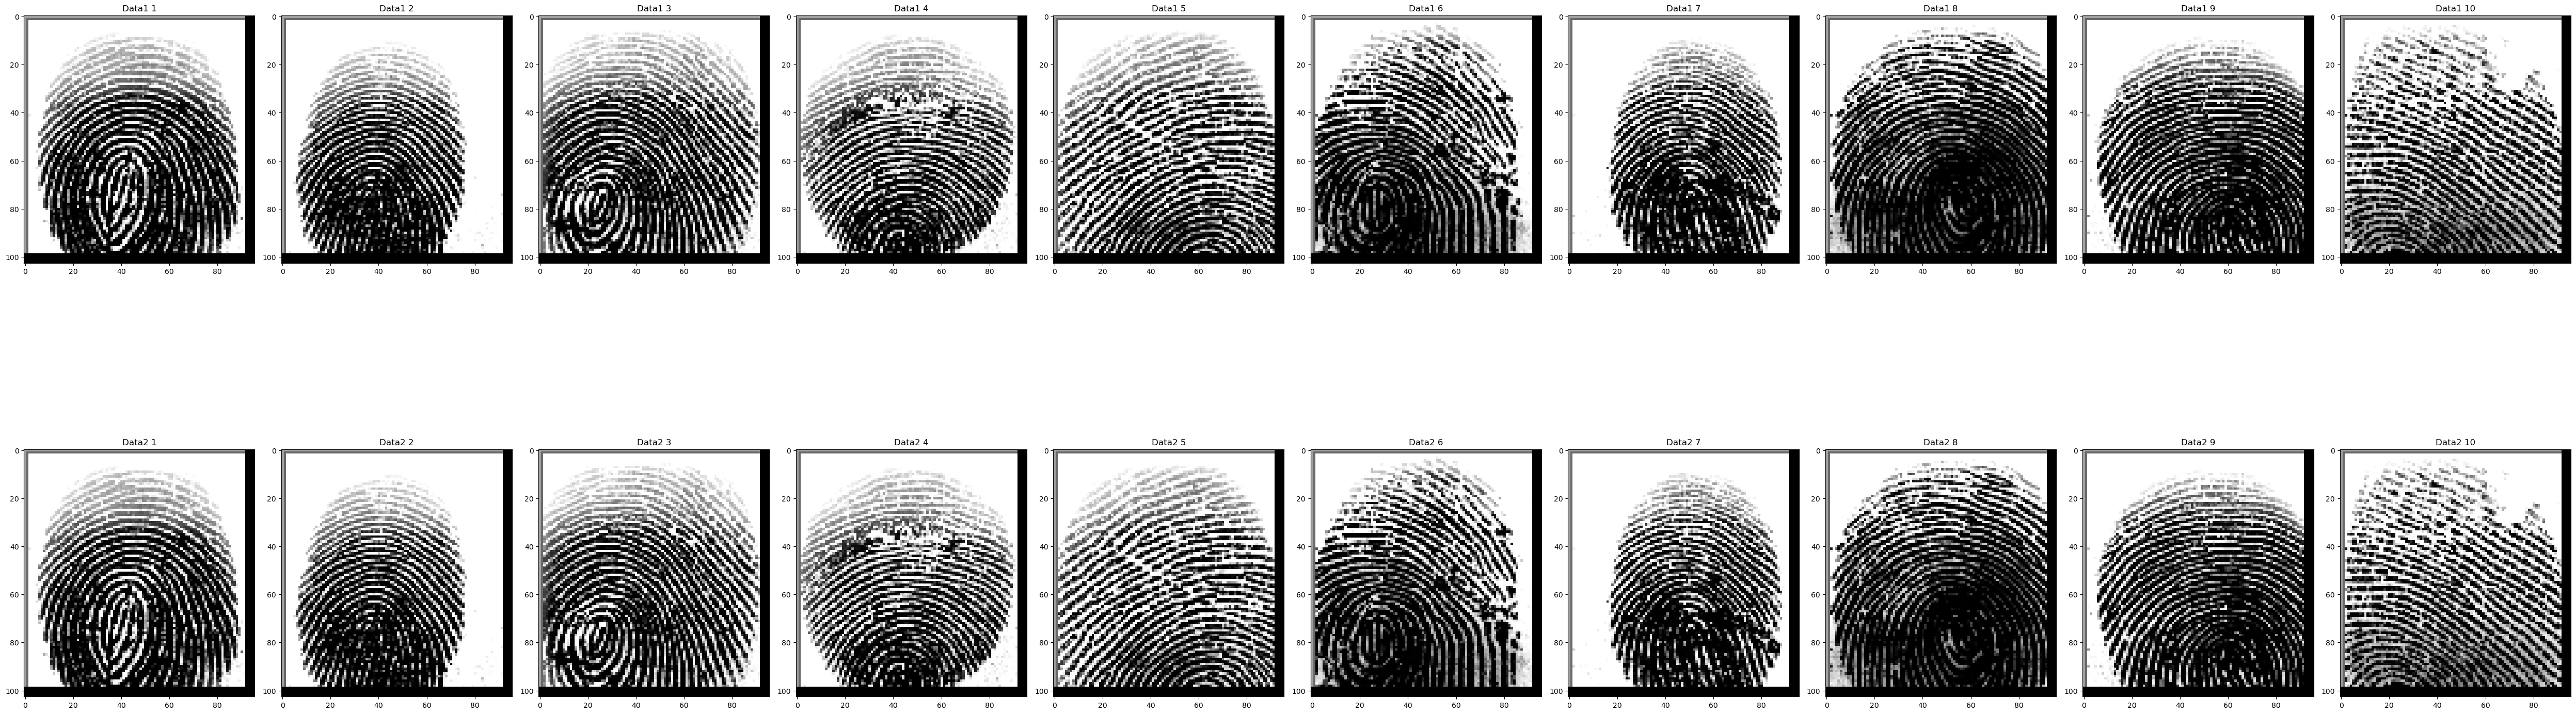

In [8]:
fig, axes = plt.subplots(2,10,figsize=(50,20))

for i, data in enumerate(gt_file1_test):
    axes[0][i].imshow(data,cmap='gray')
    axes[0][i].set_title(f'Data1 {i+1}')
for i, data in enumerate(gt_file2_test):
    axes[1][i].imshow(data,cmap='gray')
    axes[1][i].set_title(f'Data2 {i+1}')
    
plt.tight_layout()
plt.show()


In [9]:
#2개의 파일 비교
print((gt_file1_test[1] == gt_file2_test[1]).any(),(gt_file1_test[0] == gt_file2_test[0]).any()) #왜 같은거 두개 넣었지..?
print(len(gt_file_path1) , len(gt_file_path2))

True True
6000 6000


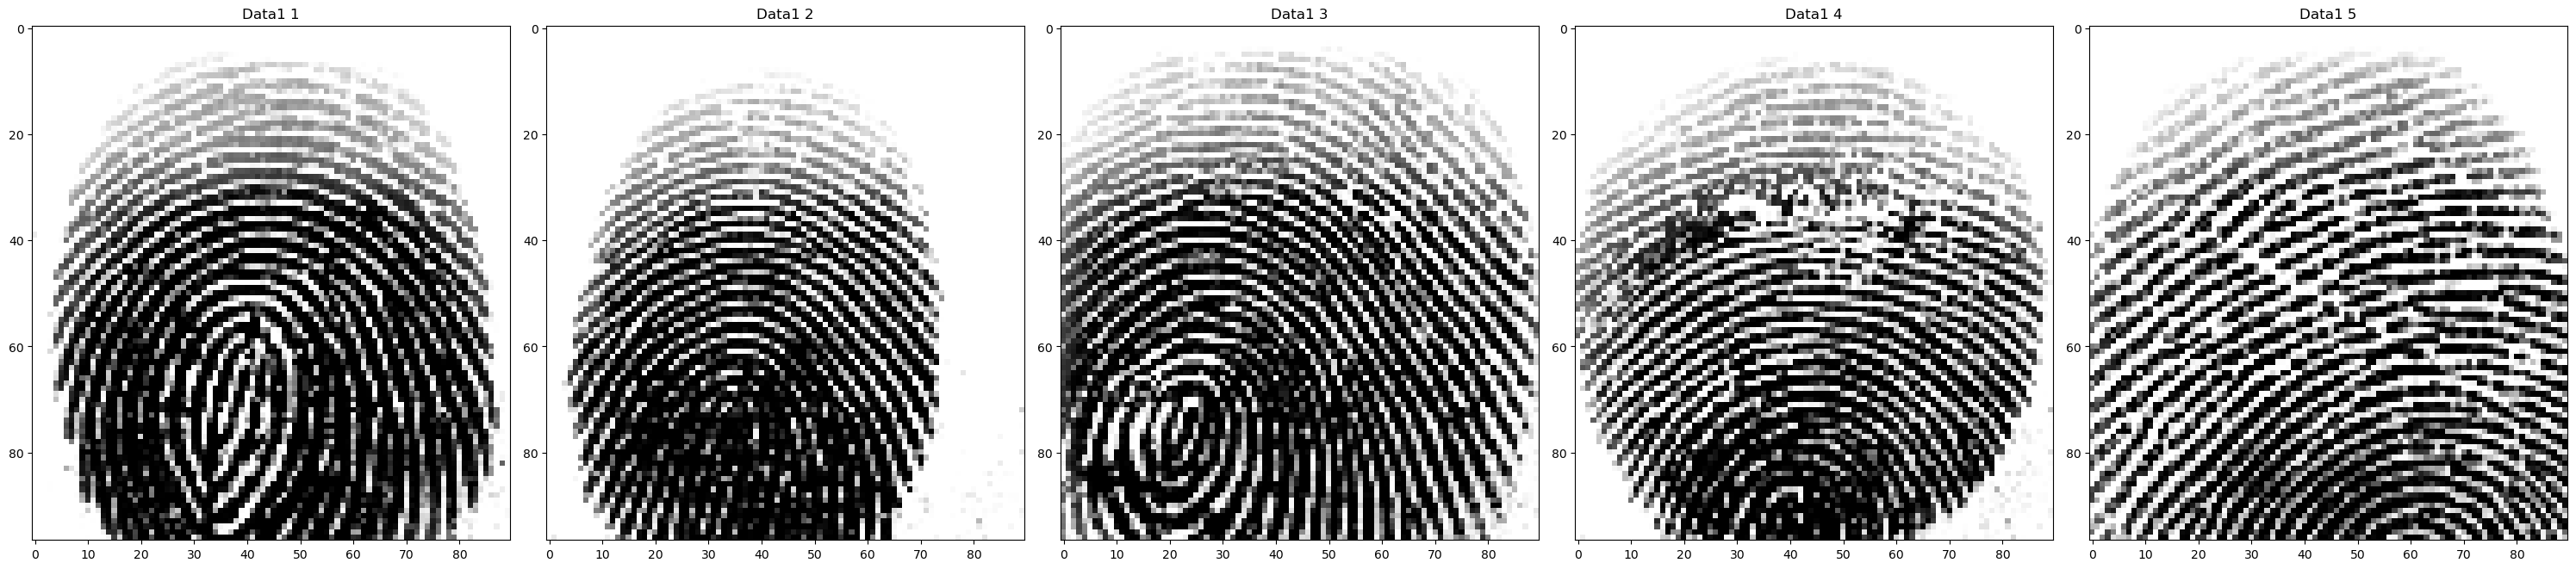

In [10]:

fig, axes = plt.subplots(1,5,figsize=(30,20))

for i, data in enumerate(gt_images[:5]):
    axes[i].imshow(data,cmap='gray')
    axes[i].set_title(f'Data1 {i+1}')

plt.tight_layout()
plt.show()

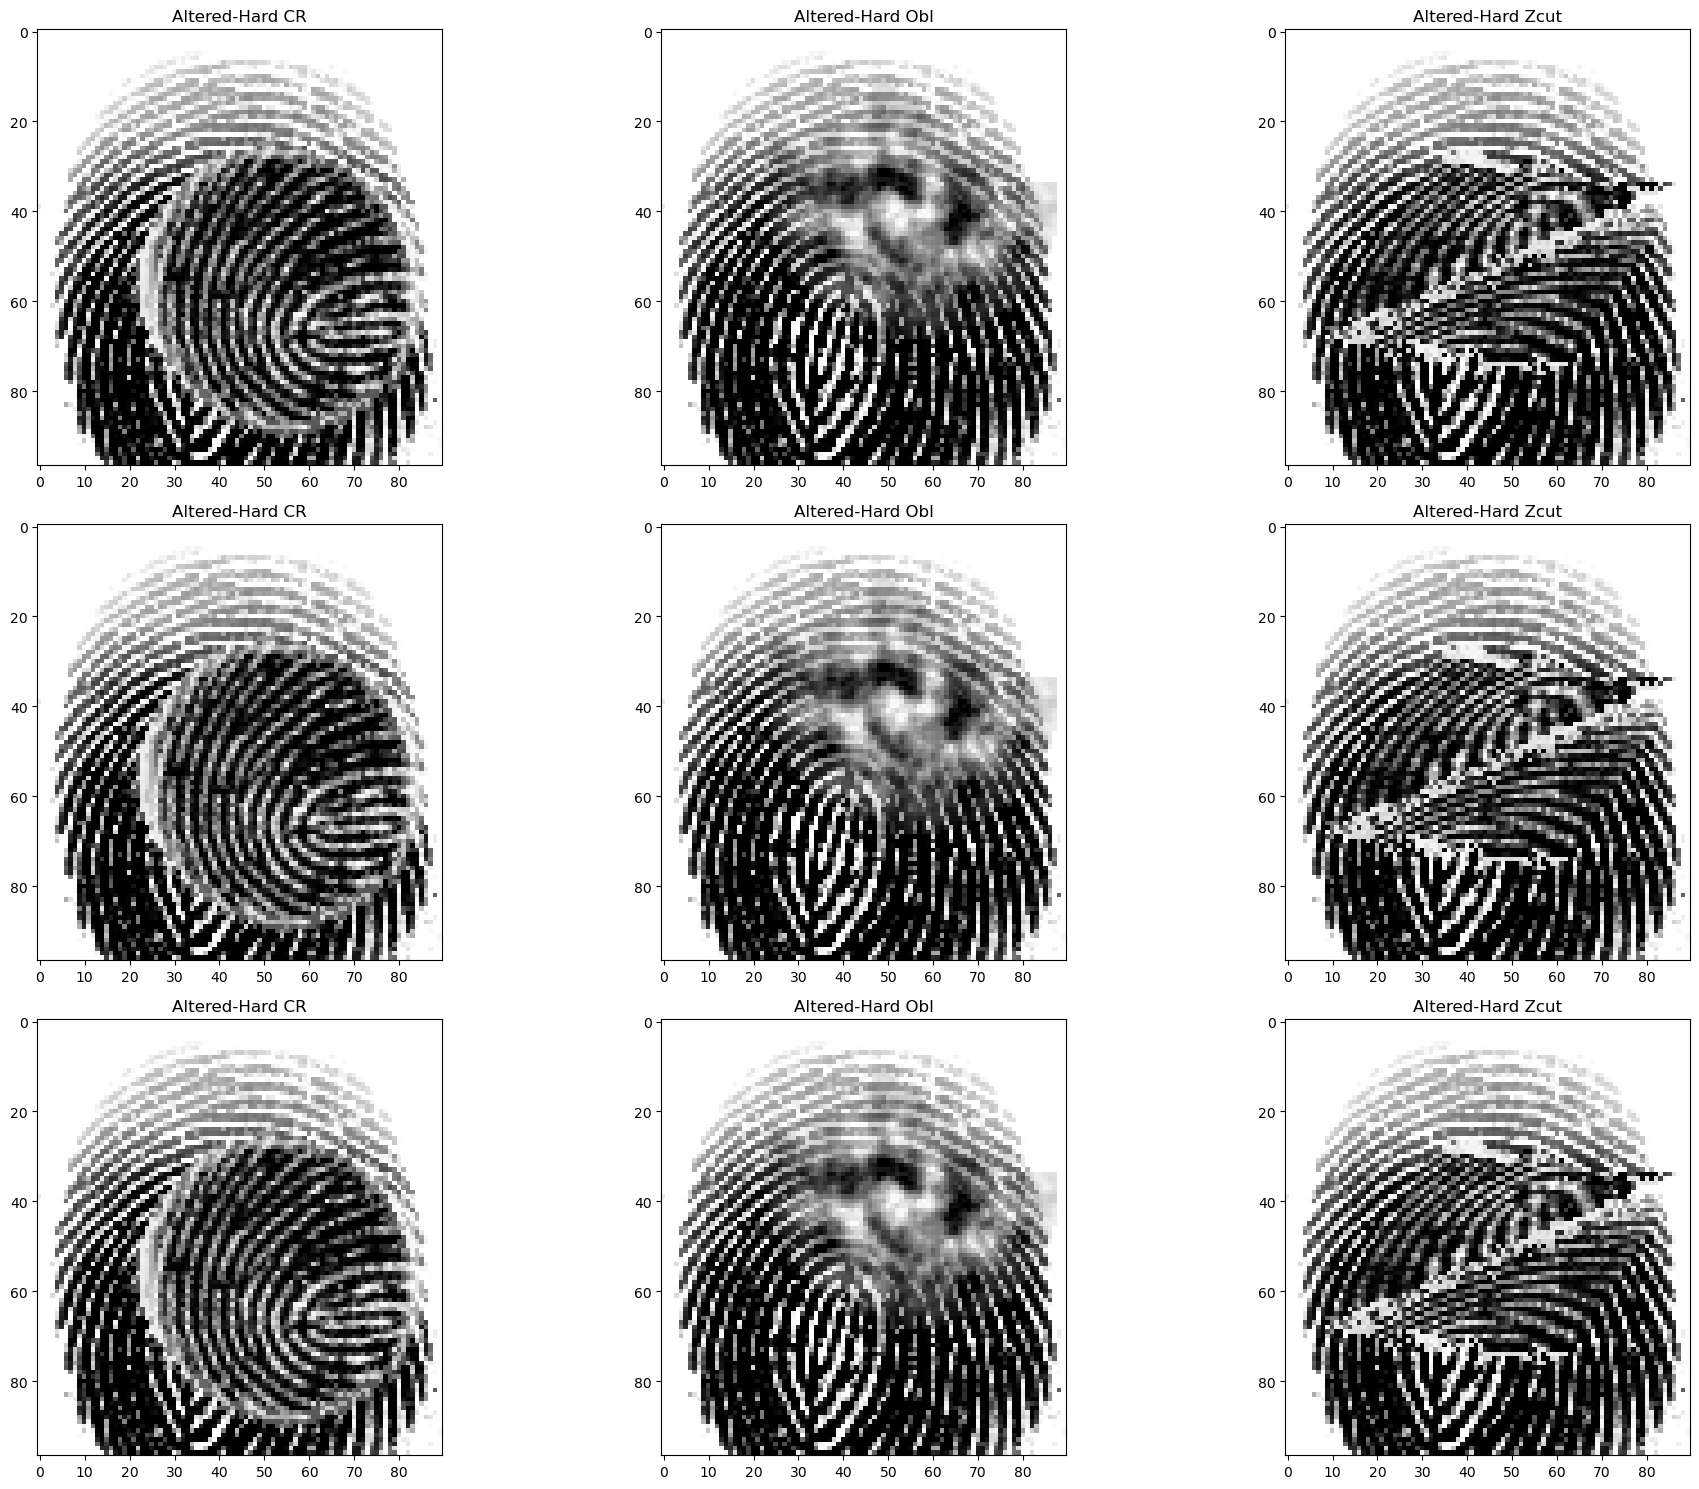

In [11]:

fig, axes = plt.subplots(3,3,figsize=(20,15))

for i,itpye in enumerate(img_type) : 
    for j,ntype in enumerate(noise_type)  :
        img = altered_images_dict[itype][ntype]['images'][0] 
        axes[i][j].imshow(img,cmap='gray')
        axes[i][j].set_title(itype+' '+ntype)

    

plt.tight_layout()

#### Histogram으로 이미지 픽셀 정보의 특이점이 있는지 확인

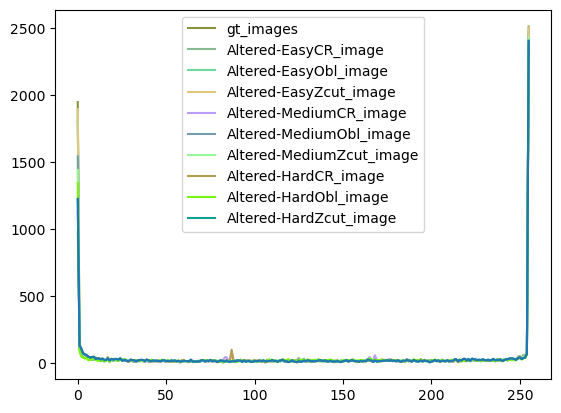

In [13]:
# Histogram 분석

# 그레이스케일 영상의 히스토그램
import random


total_images  =[gt_images]
labels = ["gt_images"]
for itype in img_type :
    for ntype in noise_type :
        total_images.append(altered_images_dict[itype][ntype]['images'])
        labels.append(itype+ntype+'_image')

# c_names = ['b','g','r','m','k',''] 
# labels = ["gt_images","easy_images","medium_images","hard_images"]

for (p, label) in zip(total_images,labels):
    color = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
    hist = cv2.calcHist(p, [0], None, [256], [0, 256]) #calchist는 이미지를 리스트로도 받아줘서 좋음 :) matplotlib의 hist는 못받아주고 심지어  1차원배열만 받음
    plt.plot(hist, color=color,label=label)

plt.legend() # 범주 추가 까먹지말자하
plt.plot(hist)
plt.show()


- Binomal한 이미지이다.
- 0과 1로 거의 확실히 구분되어져서 노이즈가 거의 없다.
- 그렇기 때문에 normalize할 이유를 못느꼈다. normalize하는 이유는 이미지의 픽셀값을 특정 범위내에 모아놓는 역할을 하는데 이미 의미가 없어보일 정도로 binomal하다.
지문 이미지를 normalize하는 방법은 여러 가지가 있습니다. 일반적으로는 다음과 같은 방법들이 사용됩니다.

Min-max normalization: 이미지 픽셀값을 최소값과 최대값으로 정규화합니다. 이 방법은 특징 추출에 유용합니다.

Z-score normalization: 이미지 픽셀값의 평균과 표준편차를 사용하여 정규화합니다. 평균값에서 얼마나 떨어져 있는지를 표준편차로 나눈 값을 사용합니다. 이 방법은 이미지 분류나 검색 등에 유용합니다.

Histogram equalization: 이미지의 밝기 분포를 균등하게 만들어줍니다. 이 방법은 이미지의 대비를 향상시켜주어 선명도를 높여주는 효과가 있습니다.

Contrast Limited Adaptive Histogram Equalization (CLAHE): 히스토그램 균등화를 적용하면서 영상의 작은 부분들을 균일하게 만들어줍니다. 이 방법은 어두운 부분과 밝은 부분을 구분하여 대비를 향상시켜줍니다.

Power-law transform: 이미지의 밝기를 제곱 또는 제곱근 등의 함수로 변환하여 이미지 대비를 조정합니다.

위와 같은 normalize 방법 중 어떤 것을 선택할지는 데이터셋과 문제에 따라 다릅니다. 일반적으로는 Min-max normalization과 Histogram equalization을 자주 사용합니다.
- OTSU로 전역 이진화를 해도 될 것 같지만 그래도 지역 이진화 중 효과가 좋은 Sauvola threath hold 기법도 써서 비교를 해보자

### 이미지 리사이징
- 특징점을 뽑아내기 너무작다고 생각함


In [14]:
for itype in img_type :
    for ntype in noise_type :
        resize_images((altered_images_dict[itype][ntype]['images']),(300,300))
 
gt_images = resize_images(gt_images,(300,300))


#### OTSU 전역 이진화 

otsu's threshold: 168.0


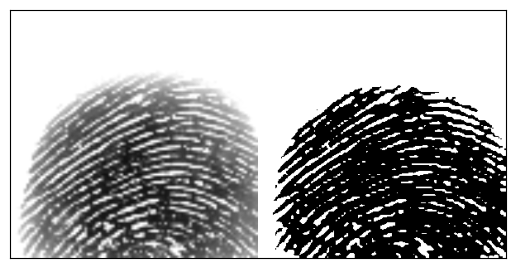

In [15]:
src = gt_images[20]
if src is None:
    print('Image load failed!')
    sys.exit()

th, dst = apply_binarization_otsu(src)
print("otsu's threshold:", th)  # 131

display_image(np.hstack((src,dst)))


#### Sauvola threath hold 지역 이진화

- 사용이유     
Sauvola thresholding 알고리즘에서 보정 상수는 이미지의 밝기에 따른 적응 임계치(threshold)를 계산하는 과정에서 사용됩니다. 이 보정 상수는 임계치를 조정하여 선명하고 깔끔한 이진 이미지를 얻기 위해 사용됩니다.

-  지역 이진화
Sauvola 알고리즘은 이미지의 각 픽셀마다 임계치를 계산합니다. 임계치는 해당 픽셀과 주변 픽셀의 밝기값에 따라 계산되며, 보정 상수는 이 계산에서 사용됩니다. 보정 상수는 이웃 픽셀의 밝기 값이 서로 비슷한 경우에는 임계치를 낮추고, 그렇지 않은 경우에는 임계치를 높이는 역할을 합니다.

구체적으로는, Sauvola 알고리즘에서 특정 픽셀의 임계치는 해당 픽셀과 이웃한 픽셀들의 밝기값의 평균(m)과 표준편차(s)를 사용하여 다음과 같이 계산됩니다.

T(x,y) = m(x,y) * (1 + k * ((s(x,y)/R) - 1))


여기서 k는 보정 상수이며, R은 이미지의 밝기 범위를 결정하는 최대 밝기값과 최소 밝기값의 차이입니다. 이 식에서 s/R이 1보다 큰 경우 보정 상수 k는 양수가 되어 임계치가 증가하고, s/R이 1보다 작은 경우 k는 음수가 되어 임계치가 감소합니다.
- 보정상수의 추가 이유 

보정 상수를 추가하는 이유는 Sauvola 알고리즘이 특정 상황에서 잘 동작하지 않을 수 있기 때문입니다. 보정 상수를 추가함으로써 성능을 향상시킬 수 있습니다. 하지만 이 값은 일반적으로 수동으로 조정해야 하며, 최적의 값은 이미지와 애플리케이션에 따라 다를 수 있습니다.
- Sauvola 이진화에서 window의 크기는 선택한 이미지에 따라 다르며, 일반적으로 이미지 크기와 특성에 따라 결정됩니다.

- 일반적으로 window 크기가 너무 작으면 지역적인 특성을 고려하지 못해 지역 임계값이 일관되지 않아 이진화 결과가 좋지 않을 수 있습니다. 반면, window 크기가 너무 크면 전체 영역을 대표하는 임계값을 구하기 때문에 지역적인 차이를 반영하지 못해 이진화 결과가 전체적으로 일관성이 없을 수 있습니다.

- 일반적으로는 15x15, 20x20, 30x30 등의 window size가 많이 사용됩니다. 또한, window size를 정하는 것이 중요하지만 k, r 등의 파라미터 설정도 중요하며, 이들 값은 window size와 함께 실험적으로 결정해야합니다. 따라서, 적절한 window size와 파라미터 설정을 위해서는 실험적인 방법을 사용하여 최적의 값을 찾는 것이 좋다고한다.


In [16]:
#reffrence https://craftofcoding.wordpress.com/2021/10/06/thresholding-algorithms-sauvola-local/
#패딩공식은 없어 내가 추가하였음.. ㅜ

#어차피 같은 이미지 사이즈이기 때문에 이 함수는 한번만 쓰면된다.
def cal_samepadding_size(image:np.array,window_size=10) :
    height, width = image.shape
    pad_w = int(((width- 1) * 1 + window_size - width) / 2)
    pad_h = int(((height- 1) * 1 + window_size - height) / 2)
    return pad_w,pad_h



def sauvola_threshold(image, window_size=15, k=0.2, r=256,pad_w=7,pad_h=7):
    # 이미지를 그레이 스케일로 변환
    #k는 contrast를 위한 파라메타
    #k는 contrast(대비)에 대한 가중치입니다. k 값이 높을수록 이미지 전체에 대한 threshold 값이 높아지므로, 이진화 결과에서 흰색 픽셀의 개수가 적어집니다. 일반적으로 0.2 ~ 0.5 사이의 값이 사용됩니다.
    #r은 표준편차를 정규화하기 위한 값으로, 이미지 밝기에 따라 달라질 수 있습니다. r 값이 클수록, 이미지의 밝기 범위가 넓어지므로 threshold 값이 커지고, 이진화 결과에서 흰색 픽셀의 개수가 감소합니다. 일반적으로 128의 값을 사용합니다.
    
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    #이미지 패딩 윈도우 때문에 없어지는 픽셀 고려 패딩은 흰색으로 함
    gray= np.pad(gray, (pad_w,pad_h), mode='constant', constant_values=255)   
    
    
    # 이미지를 float 형으로 변환
    gray = np.float32(gray)

    # 이미지의 가로, 세로 크기를 구합니다.
    height, width = gray.shape

    # 결과 이미지를 저장할 배열을 생성합니다.
    result = np.ones((height, width), dtype=np.uint8)*255

    # 이미지의 각 픽셀에 대해 sauvola thresholding 수행
    for h in range(pad_h, height - pad_h):
        for w in range(pad_w, width - pad_w):
            # 윈도우 영역 설정
            # window 영역이 넘어서는 범위까지 계산하면 안
            roi = gray[h-pad_h:h + window_size + 1, w-pad_w:w + window_size] #윈도우 크기만큼 범위설정 
            # mean과 std 계산
            mean = np.mean(roi)
            std = np.std(roi)

            # threshold 계산
            threshold = mean * (1 + k * ((std / r) - 1))
            # 결과 이미지에 threshold 적용
            if gray[h, w] > threshold:
                result[h, w] = 255
            else:
                result[h, w] = 0
    #padding된 부분 잘라주기

    result= result[pad_h:-pad_h,pad_w:-pad_w]
    return result.astype(np.uint8)

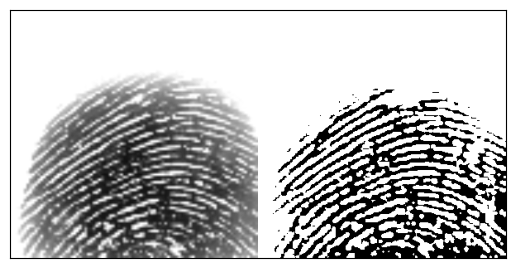

In [17]:
src = gt_images[20]
dst=sauvola_threshold(src)
display_image(np.hstack((src,dst)))

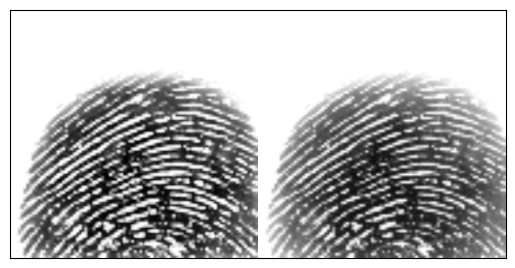

In [18]:
def apply_clahe(image: np.array, clip_limit: float = 2.0, tile_grid_size: tuple = (8, 8)):
    """
    Contrast Limited Adaptive Histogram Equalization
    
    """

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    return clahe.apply(image)


display_image(np.hstack((apply_clahe(src),src)))

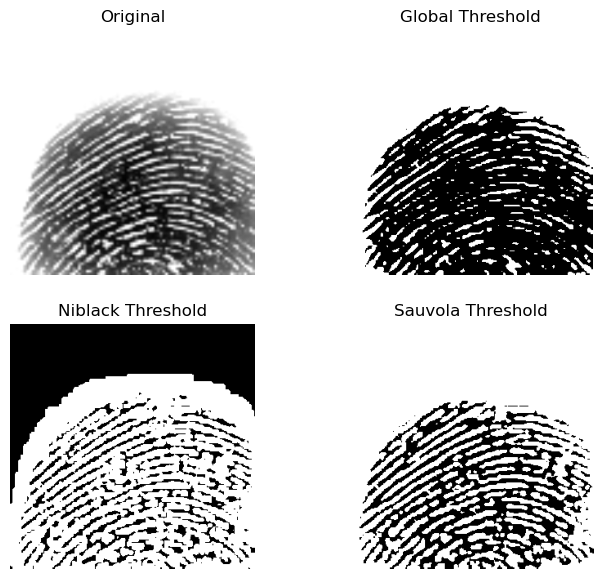

In [19]:
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

image = gt_images[20]

binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

asdf
[[ 34 181]
 [ 34 182]
 [ 34 183]
 ...
 [499 497]
 [499 498]
 [499 499]]
111.96041868525006
6957.433417854068


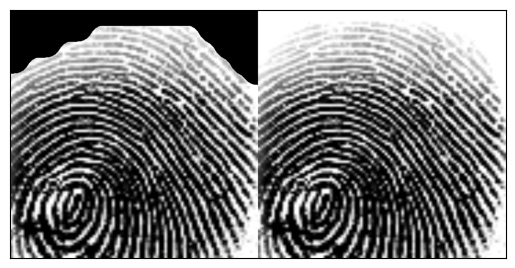

In [18]:

def normalization(img:np.ndarray, desire_mean:int =115, desire_var:int = 3337,mask:np.ndarray=None):
    """ 
    args :
        img: 입력 이미지
        desire_mean: 목표 평균 값
        desire_var: 목표 분산 값
    description :
        Desired mean과 desired variance는 이미지의 특성에 따라 다르게 설정될 수 있습니다. 따라서 이 값들을 추출하기 위해서는 해당 이미지를 미리 분석하여 적절한 값을 설정하는 것이 좋습니다.
        일반적으로, desired mean은 이미지에서 밝기의 중간값(median)을 사용하는 것이 일반적입니다. 이는 이미지 전체의 밝기 대략적인 중심값을 나타내므로, 이미지의 대부분의 부분에서 너무 밝거나 어두운 영역이 발생하지 않도록 하는 데 도움이 됩니다.
        반면에, desired variance는 이미지의 밝기 변화의 정도에 따라 다르게 설정될 수 있습니다. 예를 들어, 밝기 변화가 큰 이미지의 경우 작은 값으로 설정하여 이미지의 대비를 높일 수 있습니다. 하지만 밝기 변화가 작은 이미지의 경우 큰 값으로 설정하여 이미지를 부드럽게 만들 수 있습니다.
        desired mean과 desired variance를 추출하는 것은 해당 이미지의 특성을 고려하여 적절한 값으로 설정하는 것이 중요합니다.
    """
    
    m = np.mean(img) # 입력 이미지의 평균
    var = np.var(img) # 입력 이미지의 분산
    
    normalized_img = np.zeros_like(img) # 정규화된 이미지

    if mask is None :
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i,j] > m:
                    normalized_img[i,j] = desire_mean + np.sqrt((desire_var * (img[i,j]-m)**2) / var)
                else:
                    normalized_img[i,j] = desire_mean - np.sqrt((desire_var * (img[i,j]-m)**2) / var)

    else :
        print('asdf')
        #마스크에서 0이 아닌부분의 값만 평균과 분산을 낸다.
        mask_indices = np.argwhere(mask != 0)
        print(mask_indices)
        # 각 위치의 원본 이미지의 픽셀 값을 가져옵니다.
        pixel_value = img[mask_indices[:, 0], mask_indices[:, 1]] #0이 아닌부분의 픽셀값
        m = np.mean(pixel_value)
        print(m)
        var = np.var(pixel_value)
        print(var)
        for i,j in zip(mask_indices[:, 0],mask_indices[:, 1]):
                if img[i,j] > m:
                    normalized_img[i,j] = desire_mean + np.sqrt((desire_var * (img[i,j]-m)**2) / var)
                else:
                    normalized_img[i,j] = desire_mean - np.sqrt((desire_var * (img[i,j]-m)**2) / var)
    return normalized_img

# Define kernel size and sigma value
kernel_size = 5
sigma = 2

# Apply Gaussian filter
#blurred_image = cv2.GaussianBlur(gt_images[2], (kernel_size, kernel_size), sigma)

img = resize_image(gt_images[2],(500,500))


seg_img,mask = segmentation_maksed_thresholding(img,block=32)
norm_img = normalization(seg_img,mask=mask)
display_image(np.hstack((seg_img,img)))

In [180]:
def findMask(image, threshold=0.1, w=32):
    """
    Create a mask image consisting of only 0's and 1's. The areas containing
    1's represent the areas that look interesting to us, meaning that they
    contain a good variety of color values.
    """

    mask = np.empty(image.shape)
    height, width = image.shape
    for y in range(0, height, w):
        for x in range(0, width, w):
            block = image[y : y + w, x : x + w]
            standardDeviation = np.std(block)
            if standardDeviation < threshold:
                mask[y : y + w, x : x + w] = 0.0
            elif block.shape != (w, w):
                mask[y : y + w, x : x + w] = 0.0
            else:
                mask[y : y + w, x : x + w] = 1.0

    return mask

mask = findMask(norm_img)

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\1677796841.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ySobel = np.array(sobelOperator).astype(np.int)
C:\Users\USER\AppData\Local\Temp\ipykernel_17304\1677796841.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

(500, 500)


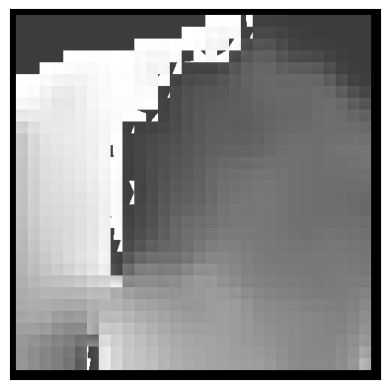

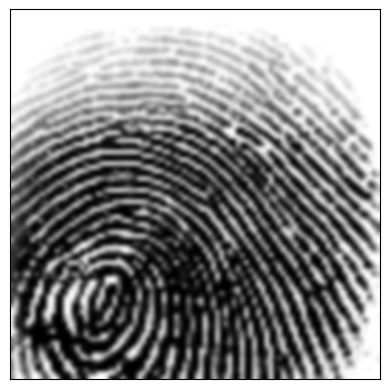

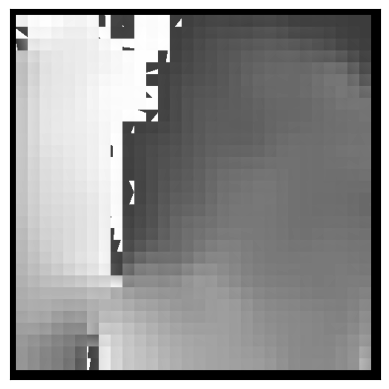

In [181]:
 # block_dx = dx[:n_blocks_row*w, :n_blocks_col*w].reshape(n_blocks_row, w, n_blocks_col, w)
    # block_dy = dy[:n_blocks_row*w, :n_blocks_col*w].reshape(n_blocks_row, w, n_blocks_col, w)
    # Vx = 2*np.sum(block_dx * block_dy, axis=(1, 3))
    # Vy = np.sum(np.square(block_dx)*np.square(block_dy),axis=(1, 3))
    # q = 0.5 * np.arctan2(Vy, Vx)
def averageOrientation(orientations, weights=None, deviation=False):
    """
    Calculate the average orientation in an orientation field.
    """

    orientations = np.asarray(orientations).flatten()
    o = orientations[0]

    aligned = np.where(
        np.absolute(orientations - o) > np.pi * 0.5,
        np.where(orientations > o, orientations - np.pi, orientations + np.pi),
        orientations,
    )
    if deviation:
        return np.average(aligned, weights=weights) % np.pi, np.std(aligned)
    else:
        return np.average(aligned, weights=weights) % np.pi
    
import numpy as np
from scipy.signal import convolve2d
from scipy import signal
def estimate_orientation(image, w=16, w_phi=3,interpolate =True):
    #Step 0 : Reduce noise
    window =16
    image = cv2.GaussianBlur(image, (3, 3), 1)
    # Step 1: Divide image into blocks of size w x w
    n_rows, n_cols = image.shape
    n_blocks_row = n_rows // w
    n_blocks_col = n_cols // w
    
    sobelOperator = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    ySobel = np.array(sobelOperator).astype(np.int)
    xSobel = np.transpose(ySobel).astype(np.int)

    # Step 2: Compute gradients using Sobel operator

    dx = convolve2d(image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), mode='same')
    dy = convolve2d(image, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), mode='same')

    # Step 3: Estimate local orientation for each block
    orientations = np.zeros((n_blocks_row, n_blocks_col))
    for i in range(n_blocks_row):
        for j in range(n_blocks_col):
            # Define the boundaries of the block
            block_x_start = i*w
            block_x_end = block_x_start + w
            block_y_start = j*w
            block_y_end = block_y_start + w

            # Compute the Fourier transform of the block
            block_dx = dx[block_x_start:block_x_end, block_y_start:block_y_end]
            block_dy = dy[block_x_start:block_x_end, block_y_start:block_y_end]

            # Compute Vx and Vy
            Vx = np.sum(2 * block_dx * block_dy)
            Vy = np.sum(block_dx**2 - block_dy**2)

            # Compute the dominant orientation
            if Vx or Vy :
                phi = 0.5 * np.arctan2(Vx, Vy)
                phi = phi + np.pi/2 if phi < 0 else phi - np.pi/2
            else :
                phi = 0
            

            # Save the dominant orientation for the block
            orientations[i, j] = phi
            orientations = np.mod(orientations, np.pi)
   
    #Step 4: Low-pass filter the orientation image
    phi_x = np.cos(2 * orientations)
    phi_y = np.sin(2 * orientations)
    
    # Define the low-pass filter
    w_f = w_phi
    w = np.ones((w_f, w_f))
    w /= np.sum(w) # Ensure unit integral
    
    # Apply the filter in a sliding window manner
    phi_x_smoothed = convolve2d(phi_x, w, mode='same')
    phi_y_smoothed = convolve2d(phi_y, w, mode='same')
    
    # Convert the smoothed vector field back to an orientation field
    s_q = np.arctan2(phi_y_smoothed, phi_x_smoothed) / 2
    orientations = np.full(image.shape, -1.0)
    if interpolate:
        hw = window // 2
        for y in range(n_blocks_col - 1):
            for x in range(n_blocks_row - 1):
                for iy in range(window):
                    for ix in range(window):
                        orientations[
                            y * window + hw + iy, x * window + hw + ix
                        ] = averageOrientation(
                            [s_q[y, x], s_q[y + 1, x], s_q[y, x + 1], s_q[y + 1, x + 1]],
                            [iy + ix, window - iy + ix, iy + window - ix, window - iy + window - ix],
                        )
    else:
        for y in range(n_blocks_col):
            for x in range(n_blocks_row):
                orientations[y * window : (y + 1) * window, x * window : (x + 1) * window] = s_q[y, x]

    
    return orientations
ori_img = estimate_orientation(norm_img)
print(ori_img.shape)
tset_ori_img = estimate_orientation(img)
display_image(ori_img)
display_image(img)
display_image(tset_ori_img)

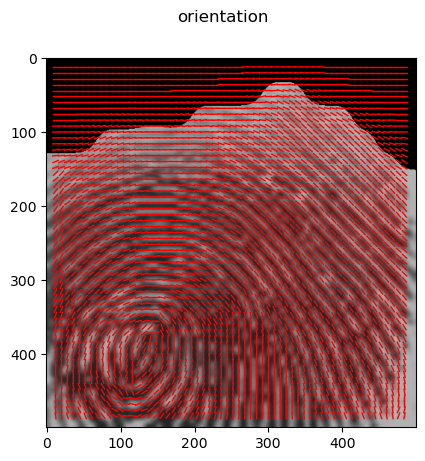

In [182]:
def showImage(image, label, vmin=0.0, vmax=255):
    plt.figure().suptitle(label)
    plt.imshow(image, cmap="gray", vmin=vmin, vmax=vmax)

def showOrientations(image, orientations, label, w=32, vmin=0.0, vmax=1.0):
    showImage(image, label)
    height, width = image.shape
    for y in range(0, height, w):
        for x in range(0, width, w):
            if np.any(orientations[y : y + w, x : x + w] == -1.0):
                continue

            cy = (y + min(y + w, height)) // 2
            cx = (x + min(x + w, width)) // 2

            orientation = orientations[y + w // 2, x + w // 2]

            plt.plot(
                [
                    cx - w * 0.5 * np.cos(orientation),
                    cx + w * 0.5 * np.cos(orientation),
                ],
                [
                    cy - w * 0.5 * np.sin(orientation),
                    cy + w * 0.5 * np.sin(orientation),
                ],
                "r-",
                lw=1.0,
            )
showOrientations(norm_img,ori_img,"orientation" ,8)

In [164]:
import cv2
import copy
# Load fingerprint image
line_img = copy.deepcopy(norm_img)

# Compute orientation image
orientation_image = ori_img

# Define line length
line_length = 50

# Define line color
line_color = (255, 255, 255)

# Draw lines corresponding to orientation angles
for i in range(orientation_image.shape[0]):
    for j in range(orientation_image.shape[1]):
        angle = orientation_image[i, j]
        x = int(j * 16+ 16/ 2)
        y = int(i * 16+ 16 / 2)
        x2 = int(x + line_length * np.cos(angle))
        y2 = int(y + line_length * np.sin(angle))
        cv2.line(line_img, (x, y), (x2, y2), line_color)

# Display image with orientation lines
cv2.imshow('Orientation Image', line_img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

(500, 500)


C:\Users\USER\AppData\Local\Temp\ipykernel_17304\1579739057.py:47: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image = ndimage.interpolation.rotate(image, np.degrees(angle), reshape=False)


(500, 500)


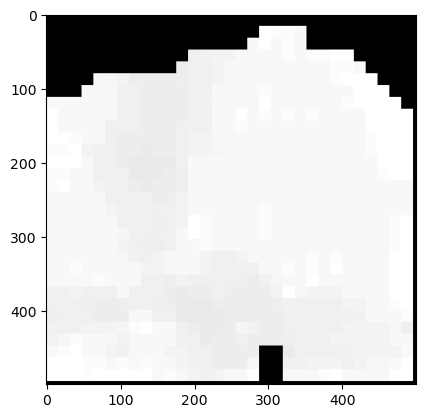

In [183]:
import scipy.ndimage as ndimage


def normalize(image):
    image = np.copy(image)
    image -= np.min(image)
    m = np.max(image)
    if m > 0.0:
        image *= 1.0 / m
    return image

def drawImage(source, destination, y, x):
    height, width = source.shape
    height = min(height, destination.shape[0] - y)
    width = min(width, destination.shape[1] - x)
    destination[y : y + height, x : x + width] = source[0:height, 0:width]


def rotateAndCrop(image, angle):
    """
    Rotate an image and crop the result so that there are no black borders.
    This implementation is based on this stackoverflow answer:
        http://stackoverflow.com/a/16778797
    :param image: The image to rotate.
    :param angle: The angle in gradians.
    :returns: The rotated and cropped image.
    """

    h, w = image.shape

    width_is_longer = w >= h
    side_long, side_short = (w, h) if width_is_longer else (h, w)

    # since the solutions for angle, -angle and 180-angle are all the same,
    # if suffices to look at the first quadrant and the absolute values of sin,cos:
    sin_a, cos_a = abs(np.sin(angle)), abs(np.cos(angle))
    if side_short <= 2.0 * sin_a * cos_a * side_long:
        # half constrained case: two crop corners touch the longer side,
        # the other two corners are on the mid-line parallel to the longer line
        x = 0.5 * side_short
        wr, hr = (x / sin_a, x / cos_a) if width_is_longer else (x / cos_a, x / sin_a)
    else:
        # fully constrained case: crop touches all 4 sides
        cos_2a = cos_a * cos_a - sin_a * sin_a
        wr, hr = (w * cos_a - h * sin_a) / cos_2a, (h * cos_a - w * sin_a) / cos_2a

    image = ndimage.interpolation.rotate(image, np.degrees(angle), reshape=False)

    hr, wr = int(hr), int(wr)
    y, x = (h - hr) // 2, (w - wr) // 2

    return image[y : y + hr, x : x + wr]

def estimateFrequencies(image, orientations, w=32):
    """
    Estimate ridge or line frequencies in an image, given an orientation field.
    This is more or less an implementation of of the algorithm in Chapter 2.5 in
    the paper:
        Fingerprint image enhancement: Algorithm and performance evaluation
        Hong, L., Wan, Y. & Jain, A. (1998)
    :param image: The image to estimate orientations in.
    :param orientations: An orientation field such as one returned from the
                         estimateOrientations() function.
    :param w: The block size.
    :returns: An ndarray the same shape as the image, filled with frequencies.
    """
    rotations = np.zeros(image.shape)

    height, width = image.shape
    print(image.shape)
    yblocks, xblocks = height // w, width // w
    F = np.empty((yblocks, xblocks))
    for y in range(yblocks):
        for x in range(xblocks):
            orientation = orientations[y * w + w // 2, x * w + w // 2]

            block = image[y * w : (y + 1) * w, x * w : (x + 1) * w]
            block = rotateAndCrop(block, np.pi * 0.5 + orientation)
            if block.size == 0:
                F[y, x] = -1
                continue

            drawImage(block, rotations, y * w, x * w)

            columns = np.sum(block, (0,))
            #columns = normalize(columns)
            peaks = signal.find_peaks_cwt(columns, np.array([3]))
            if len(peaks) < 2:
                F[y, x] = -1
            else:
                f = (peaks[-1] - peaks[0]) / (len(peaks) - 1)
                if f < 5 or f > 15:
                    F[y, x] = -1
                else:
                    F[y, x] = 1 / f

    # showImage(rotations, "rotations")

    frequencies = np.full(image.shape, -1.0)
    F = np.pad(F, 1, mode="edge")
    for y in range(yblocks):
        for x in range(xblocks):
            surrounding = F[y : y + 3, x : x + 3]
            surrounding = surrounding[np.where(surrounding >= 0.0)]
            if surrounding.size == 0:
                frequencies[y * w : (y + 1) * w, x * w : (x + 1) * w] = -1
            else:
                frequencies[y * w : (y + 1) * w, x * w : (x + 1) * w] = np.median(
                    surrounding
                )

    return frequencies
freq_img =estimateFrequencies(norm_img,ori_img,w=16)
plt.imshow(estimateFrequencies(norm_img,ori_img,w=16))

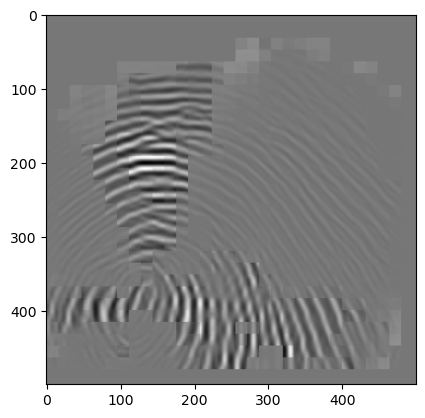

In [184]:
def convolve(image, kernel, origin=None, shape=None, pad=True):
    """
    Apply a kernel to an image or to a part of an image.
    :param image:   The source image.
    :param kernel:  The kernel (an ndarray of black and white, or grayvalues).
    :param origin:  The origin of the part of the image to be convolved.
                    Defaults to (0, 0).
    :param shape:   The shape of the part of the image that is to be convolved.
                    Defaults to the shape of the image.
    :param pad:     Whether the image should be padded before applying the
                    kernel. Passing False here will cause indexing errors if
                    the kernel is applied at the edge of the image.
    :returns:       The resulting image.
    """
    if not origin:
        origin = (0, 0)

    if not shape:
        shape = (image.shape[0] - origin[0], image.shape[1] - origin[1])

    result = np.empty(shape)

    if callable(kernel):
        k = kernel(0, 0)
    else:
        k = kernel

    kernelOrigin = (-k.shape[0] // 2, -k.shape[1] // 2)
    kernelShape = k.shape

    topPadding = 0
    leftPadding = 0

    if pad:
        topPadding = max(0, -(origin[0] + kernelOrigin[0]))
        leftPadding = max(0, -(origin[1] + kernelOrigin[1]))
        bottomPadding = max(
            0,
            (origin[0] + shape[0] + kernelOrigin[0] + kernelShape[0]) - image.shape[0],
        )
        rightPadding = max(
            0,
            (origin[1] + shape[1] + kernelOrigin[1] + kernelShape[1]) - image.shape[1],
        )

        padding = (topPadding, bottomPadding), (leftPadding, rightPadding)

        if np.max(padding) > 0.0:
            image = np.pad(image, padding, mode="edge")

    for y in range(shape[0]):
        for x in range(shape[1]):
            iy = topPadding + origin[0] + y + kernelOrigin[0]
            ix = leftPadding + origin[1] + x + kernelOrigin[1]

            block = image[iy : iy + kernelShape[0], ix : ix + kernelShape[1]]
            if callable(kernel):
                result[y, x] = np.sum(block * kernel(y, x))
            else:
                result[y, x] = np.sum(block * kernel)

    return result

def kernelFromFunction(size, f):
    """
    Creates a kernel of the given size, populated with values obtained by
    calling the given function.
    :param size: The desired size of the kernel.
    :param f:    The function.
    :returns:    The created kernel.
    """

    kernel = np.empty((size, size))
    for i in range(0, size):
        for j in range(0, size):
            kernel[i, j] = f(i - size / 2, j - size / 2)

    return kernel
def gaborKernel(size, angle, frequency):
    """
    Create a Gabor kernel given a size, angle and frequency.
    Code is taken from https://github.com/rtshadow/biometrics.git
    """

    angle += np.pi * 0.5
    cos = np.cos(angle)
    sin = -np.sin(angle)

    yangle = lambda x, y: x * cos + y * sin
    xangle = lambda x, y: -x * sin + y * cos

    xsigma = ysigma = 4

    return kernelFromFunction(size, lambda x, y:
            np.exp(-(
                (xangle(x, y) ** 2) / (xsigma ** 2) +
                (yangle(x, y) ** 2) / (ysigma ** 2)) / 2) *
            np.cos(2 * np.pi * frequency * xangle(x, y)))

def averageFrequency(frequencies):
    """
    Calculate the average frequency in a frequency field.
    """

    frequencies = frequencies[np.where(frequencies >= 0.0)]
    if frequencies.size == 0:
        return -1
    return np.average(frequencies)
def gaborFilter(image, orientations, frequencies, w=32):
    result = np.empty(image.shape)

    height, width = image.shape
    for y in range(0, height - w, w):
        for x in range(0, width - w, w):
            orientation = orientations[y+w//2, x+w//2]
            frequency = averageFrequency(frequencies[y:y+w, x:x+w])

            if frequency < 0.0:
                result[y:y+w, x:x+w] = image[y:y+w, x:x+w]
                continue

            kernel = gaborKernel(16, orientation, frequency)
            result[y:y+w, x:x+w] = convolve(image, kernel, (y, x), (w, w))

    return result

ka = gaborFilter(img,ori_img,freq_img,w=16)

sa = np.where(mask == 1.0, ka,1.0)
plt.imshow(sa)


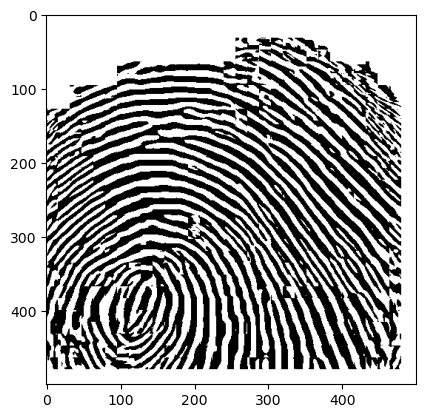

In [185]:
def binarize(image, w=16):
    """
    Perform a local binarization of an image. For each cell of the given size
    w, the average value is calculated. Every pixel that is below this value,
    is set to 0, every pixel above, is set to 1.

    :param image: The image to be binarized.
    :param w:     The size of the cell.
    :returns:     The binarized image.
    """

    image = np.copy(image)
    height, width = image.shape
    for y in range(0, height, w):
        for x in range(0, width, w):
            block = image[y : y + w, x : x + w]
            threshold = np.average(block)
            image[y : y + w, x : x + w] = np.where(block >= threshold, 1.0, 0.0)

    return image

plt.imshow(binarize(sa))

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


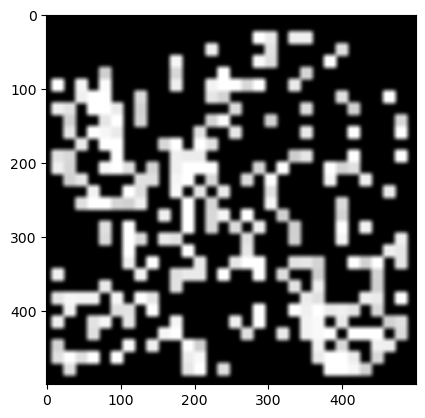

In [57]:
import numpy as np
from scipy.signal import convolve2d

def estimate_local_ridge_frequency(image, orientation_map, block_size=(16,16), ori_window_size=(32,16), freq_range=(1/25, 1/3)):

    height, width = image.shape
    block_h, block_w = block_size
    ori_window_h, ori_window_w = ori_window_size
    freq_min, freq_max = freq_range
    freq_map = np.zeros((height, width))
    ot_len = len(orientation_map)
    
    for i,i_o in zip(range(0, height - (height % block_h), block_h),range(ot_len)):
        for j,j_o in zip(range(0,  width - (width % block_w), block_w),range(ot_len)):
            
            i_center = i + block_h // 2
            j_center = j + block_w // 2
            orientation = orientation_map[i_o,j_o]
            
            ori_window = np.zeros((ori_window_h, ori_window_w))
           
            for k in range(ori_window_h):
                for l in range(ori_window_w):
                    u = i_center + (l - ori_window_w//2) * np.sin(orientation) + (k - ori_window_h//2) * np.cos(orientation)
                    v = j_center + (l - ori_window_w//2) * np.cos(orientation) - (k - ori_window_h//2) * np.sin(orientation)
                    if 0 <= u < height and 0 <= v < width: #좌표저장
                        ori_window[k, l] = image[int(u), int(v)]
           
            # Step 3: Compute x-signature
            x_signature = np.zeros(ori_window_w)
            for k in range(ori_window_w):
                sum_g = 0
                for d in range(ori_window_h):
                    if 0 <= u < height and 0 <= v < width:
                        sum_g += ori_window[int(d), int(k)]
                x_signature[k] = sum_g / ori_window_h
            
          
            # Check for consecutive peaks to estimate frequency
            peak_indices = np.where((x_signature[1:-1] > x_signature[:-2]) & (x_signature[1:-1] > x_signature[2:]))[0] + 1
        
            if len(peak_indices) > 1:
                avg_distance = np.mean(np.diff(peak_indices))
                freq = 1 / avg_distance
                if freq_min <= freq <= freq_max:
                    freq_map[i-block_h//2:i+block_h//2, j-block_w//2:j+block_w//2] = freq
            else:
                freq_map[i-block_h//2:i+block_h//2, j-block_w//2:j+block_w//2] = -1

    # Step 4: Assign -1 to invalid frequency values
    freq_map[np.where((freq_map < freq_min) | (freq_map > freq_max))] = -1
    
    # Step 5: Interpolate frequency values for invalid blocks
    kernel = np.ones((7,7)) / 49
    freq_map_convolved = convolve2d(freq_map, kernel, mode='same', boundary='symm')
    freq_map[np.where(freq_map == -1)] = freq_map_convolved[np.where(freq_map == -1)]
    
    # Step 6: Apply low-pass filter
    filter_kernel = np.ones((7,7)) / 49
    filtered_freq_map = convolve2d(freq_map, filter_kernel, mode='same', boundary='symm')
    return filtered_freq_map

freq_img = estimate_local_ridge_frequency(img,ori_img)
print(freq_img)
plt.imshow(freq_img)

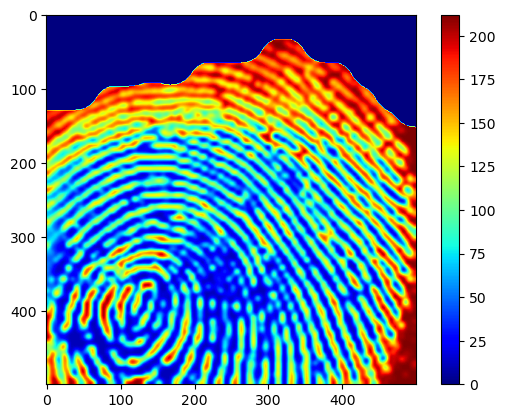

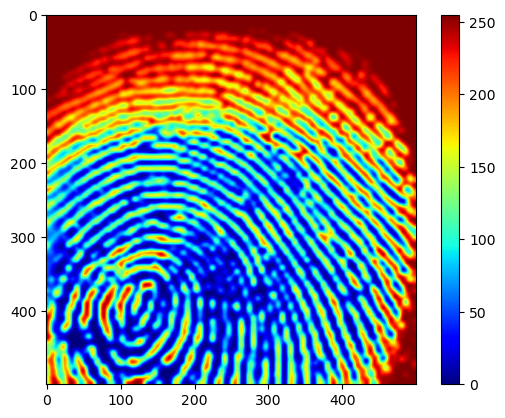

In [116]:
import matplotlib.pyplot as plt

# orientation field 이미지 출력
plt.imshow(norm_img, cmap='jet')
plt.colorbar()
plt.show()

plt.imshow(img, cmap='jet')
plt.colorbar()
plt.show()


In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_orientation(imgs, orientations, block_size=32):
    img = imgs.copy()
    # Draw lines representing local orientation in each block
    for i in range(block_size//2, img.shape[0]-block_size//2, block_size):
        for j in range(block_size//2, img.shape[1]-block_size//2, block_size):
            angle = orientations[i, j]
            x = int(j + np.cos(angle) * block_size/2)
            y = int(i + np.sin(angle) * block_size/2)
            cv2.line(img, (j, i), (x, y), (255, 0, 0), 2)
    
    # Show the image
    plt.imshow(img, cmap='gray')
    plt.show()

# Load the fingerprint image


# Estimate the local ridge orientation

print(img.shape)
print(ori_img.shape)

# Visualize the orientation
visualize_orientation(img, ori_img)



(500, 500)
(32, 32)


IndexError: index 48 is out of bounds for axis 1 with size 32

전역 이진화는 별로 효과가 좋지 못하다. 지문을 찍을때의 압력때문에 지문 사이사이의 값들이 조금씩 차이가나서 망가지는듯 하여 지역이진화를 쓰면 좋겠다.
sauvola를 직접 구현하였으나 역시 c++로 구현된 skimage가 더 빠르다. 걍 만들어진거 있으면 있는거 쓰고, 구현할려면 C++로 해야할듯하다.

#### Data Pipeline

In [19]:
def normalise(img):
    return (img - np.mean(img))/(np.std(img))

def create_segmented_and_variance_images(im, w, threshold=0.1):
    """
    Returns mask identifying the ROI. Calculates the standard deviation in each image block and threshold the ROI
    It also normalises the intesity values of
    the image so that the ridge regions have zero mean, unit standard
    deviation.
    :param im: Image
    :param w: size of the block
    :param threshold: std threshold
    :return: segmented_image
    """
    (y, x) = im.shape
    threshold = np.std(im)*threshold

    image_variance = np.zeros(im.shape)
    segmented_image = im.copy()
    mask = np.ones_like(im)

    for i in range(0, x, w):
        for j in range(0, y, w):
            box = [i, j, min(i + w, x), min(j + w, y)]
            block_stddev = np.std(im[box[1]:box[3], box[0]:box[2]])
            image_variance[box[1]:box[3], box[0]:box[2]] = block_stddev

    # apply threshold
    mask[image_variance < threshold] = 0

    # smooth mask with a open/close morphological filter
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w*2, w*2))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # normalize segmented image
    segmented_image *= mask
    im = normalise(im)
    mean_val = np.mean(im[mask==0])
    std_val = np.std(im[mask==0])
    norm_img = (im - mean_val)/(std_val)

    return segmented_image, norm_img, mask

In [20]:
import cv2
import numpy as np

def compute_orientation(img, block_size):
    # Compute gradients using Sobel operator
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude and direction
    magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    orientation = np.arctan2(sobel_y, sobel_x)

    # Compute orientation field
    rows, cols = img.shape
    orientation_field = np.zeros((rows, cols))
    block_half_size = block_size // 2

    for i in range(block_half_size, rows - block_half_size):
        for j in range(block_half_size, cols - block_half_size):
            # Compute local orientation histogram
            histogram = np.zeros(36)
            for k in range(-block_half_size, block_half_size + 1):
                for l in range(-block_half_size, block_half_size + 1):
                    # Calculate orientation bin index
                    bin_index = int(np.floor((orientation[i + k, j + l] + np.pi) * 18 / np.pi))
                    histogram[bin_index] += magnitude[i + k, j + l]

            # Find the dominant orientation
            dominant_orientation = np.argmax(histogram)
            orientation_field[i, j] = dominant_orientation * np.pi / 18

    return orientation_field


In [21]:
"""
To facilitate extraction of minutiae the image must be skeletonized: a sequence of morphological
erosion operations will reduce the thickness of the striations until the latter is equal to one pixel
while maintaining the connectivity of the striations ( That is to say that the continuity of the
striaes must be respected, holes must not be inserted). While some papers use Rosenfeld algorithm for its
simplicity. [https://airccj.org/CSCP/vol7/csit76809.pdf pg.91] I used skimage Zha84 A fast parallel algorithm for
thinning digital patterns, T. Y. Zhang and C. Y. Suen, Communications of the ACM, March 1984, Volume 27, Number 3.
"""
import numpy as np
import cv2 as cv
#from utils.crossing_number import calculate_minutiaes
from skimage.morphology import skeletonize as skelt
from skimage.morphology import thin
def skeletonize(image_input):
    """
    https://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html
    Skeletonization reduces binary objects to 1 pixel wide representations.
    skeletonize works by making successive passes of the image. On each pass, border pixels are identified
    and removed on the condition that they do not break the connectivity of the corresponding object.
    :param image_input: 2d array uint8
    :return:
    """
    image = np.zeros_like(image_input)
    image[image_input == 0] = 1.0
    output = np.zeros_like(image_input)

    skeleton = skelt(image)

    """uncomment for testing"""
    # thinned = thin(image)
    # thinned_partial = thin(image, max_iter=25)
    #
    # def minu_(skeleton, name):
    #     cv.imshow('thin_'+name, output)
    #     cv.bitwise_not(output, output)
    #     minutias = calculate_minutiaes(output, kernel_size=5); cv.imshow('minu_'+name, minutias)
    # # minu_(output, 'skeleton')
    # # minu_(output, 'thinned')
    # # minu_(output, 'thinned_partial')
    # # cv.waitKeyEx()

    output[skeleton] = 255
    cv.bitwise_not(output, output)

    return output


def thinning_morph(image, kernel):
    """
    Thinning image using morphological operations
    :param image: 2d array uint8
    :param kernel: 3x3 2d array unint8
    :return: thin images
    """
    thining_image = np.zeros_like(image)
    img = image.copy()

    while 1:
        erosion = cv.erode(img, kernel, iterations = 1)
        dilatate = cv.dilate(erosion, kernel, iterations = 1)

        subs_img = np.subtract(img, dilatate)
        cv.bitwise_or(thining_image, subs_img, thining_image)
        img = erosion.copy()

        done = (np.sum(img) == 0)

        if done:
          break

    # shift down and compare one pixel offset
    down = np.zeros_like(thining_image)
    down[1:-1, :] = thining_image[0:-2, ]
    down_mask = np.subtract(down, thining_image)
    down_mask[0:-2, :] = down_mask[1:-1, ]
    cv.imshow('down', down_mask)

    # shift right and compare one pixel offset
    left = np.zeros_like(thining_image)
    left[:, 1:-1] = thining_image[:, 0:-2]
    left_mask = np.subtract(left, thining_image)
    left_mask[:, 0:-2] = left_mask[:, 1:-1]
    cv.imshow('left', left_mask)

    # combine left and down mask
    cv.bitwise_or(down_mask, down_mask, thining_image)
    output = np.zeros_like(thining_image)
    output[thining_image < 250] = 255

    return output

In [172]:
import math
def calculate_angles(im, W, smoth=False):
    """
    anisotropy orientation estimate, based on equations 5 from:
    https://pdfs.semanticscholar.org/6e86/1d0b58bdf7e2e2bb0ecbf274cee6974fe13f.pdf
    :param im:
    :param W: int width of the ridge
    :return: array
    """
    j1 = lambda x, y: 2 * x * y
    j2 = lambda x, y: x ** 2 - y ** 2
    j3 = lambda x, y: x ** 2 + y ** 2

    (y, x) = im.shape

    sobelOperator = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    ySobel = np.array(sobelOperator).astype(np.int)
    xSobel = np.transpose(ySobel).astype(np.int)

    result = [[] for i in range(1, y, W)]

    Gx_ = cv2.filter2D(im/125,-1, ySobel)*125
    Gy_ = cv2.filter2D(im/125,-1, xSobel)*125

    for j in range(1, y, W):
        for i in range(1, x, W):
            nominator = 0
            denominator = 0
            for l in range(j, min(j + W, y - 1)):
                for k in range(i, min(i + W , x - 1)):
                    Gx = round(Gx_[l, k])  # horizontal gradients at l, k
                    Gy = round(Gy_[l, k])  # vertial gradients at l, k
                    nominator += j1(Gx, Gy)
                    denominator += j2(Gx, Gy)

            # nominator = round(np.sum(Gy_[j:min(j + W, y - 1), i:min(i + W , x - 1)]))
            # denominator = round(np.sum(Gx_[j:min(j + W, y - 1), i:min(i + W , x - 1)]))
            if nominator or denominator:
                angle = (math.pi + math.atan2(nominator, denominator)) / 2
                orientation = np.pi/2 + math.atan2(nominator,denominator)/2
                result[int((j-1) // W)].append(angle)
            else:
                result[int((j-1) // W)].append(0)

            # segment image
            # focus_img = im[j:min(j + W, y - 1), i:min(i + W , x - 1)]
            # segmentator = -1 if segmentator/W*W < np.max(focus_img)*

    result = np.array(result)
    return result
def frequest(im, orientim, kernel_size, minWaveLength, maxWaveLength):
    """
    Based on https://pdfs.semanticscholar.org/ca0d/a7c552877e30e1c5d87dfcfb8b5972b0acd9.pdf pg.14
    Function to estimate the fingerprint ridge frequency within a small block
    of a fingerprint image.
    An image block the same size as im with all values set to the estimated ridge spatial frequency.  If a
    ridge frequency cannot be found, or cannot be found within the limits set by min and max Wavlength freqim is set to zeros.
    """
    rows, cols = np.shape(im)
    
    # Find mean orientation within the block. This is done by averaging the
    # sines and cosines of the doubled angles before reconstructing the angle again.
    cosorient = np.cos(2*orientim) # np.mean(np.cos(2*orientim))
    sinorient = np.sin(2*orientim) # np.mean(np.sin(2*orientim))
    block_orient = math.atan2(sinorient,cosorient)/2
    
    # Rotate the image block so that the ridges are vertical
    rotim = scipy.ndimage.rotate(im,block_orient/np.pi*180 + 90,axes=(1,0),reshape = False,order = 3,mode = 'nearest')

    # Now crop the image so that the rotated image does not contain any invalid regions.
    cropsze = int(np.fix(rows/np.sqrt(2)))
    offset = int(np.fix((rows-cropsze)/2))
    rotim = rotim[offset:offset+cropsze][:,offset:offset+cropsze]

    # Sum down the columns to get a projection of the grey values down the ridges.
    ridge_sum = np.sum(rotim, axis = 0)
    dilation = scipy.ndimage.grey_dilation(ridge_sum, kernel_size, structure=np.ones(kernel_size))
    ridge_noise = np.abs(dilation - ridge_sum); peak_thresh = 2;
    maxpts = (ridge_noise < peak_thresh) & (ridge_sum > np.mean(ridge_sum))
    maxind = np.where(maxpts)
    _, no_of_peaks = np.shape(maxind)
    
    # Determine the spatial frequency of the ridges by dividing the
    # distance between the 1st and last peaks by the (No of peaks-1). If no
    # peaks are detected, or the wavelength is outside the allowed bounds, the frequency image is set to 0
    if(no_of_peaks<2):
        freq_block = np.zeros(im.shape)
    else:
        waveLength = (maxind[0][-1] - maxind[0][0])/(no_of_peaks - 1)
        if waveLength>=minWaveLength and waveLength<=maxWaveLength:
            freq_block = 1/np.double(waveLength) * np.ones(im.shape)
        else:
            freq_block = np.zeros(im.shape)
    return(freq_block)


def ridge_freq(im, mask, orient, block_size, kernel_size, minWaveLength, maxWaveLength):
    # Function to estimate the fingerprint ridge frequency across a
    # fingerprint image.
    rows,cols = im.shape
    freq = np.zeros((rows,cols))

    for row in range(0, rows - block_size, block_size):
        for col in range(0, cols - block_size, block_size):
            image_block = im[row:row + block_size][:, col:col + block_size]
            angle_block = orient[row // block_size][col // block_size]
            if angle_block:
                freq[row:row + block_size][:, col:col + block_size] = frequest(image_block, angle_block, kernel_size,
                                                                               minWaveLength, maxWaveLength)

    freq = freq*mask
    freq_1d = np.reshape(freq,(1,rows*cols))
    ind = np.where(freq_1d>0)
    ind = np.array(ind)
    ind = ind[1,:]
    non_zero_elems_in_freq = freq_1d[0][ind]
    medianfreq = np.median(non_zero_elems_in_freq) * mask

    return medianfreq

"""
The principle of gabor filtering is to modify the value of the pixels of an image, generally in order to
improve its appearance. In practice, it is a matter of creating a new image using the pixel values
of the original image, in order to select in the Fourier domain the set of frequencies that make up
the region to be detected. The filter used is the Gabor filter with even symmetry and oriented at 0 degrees.

The resulting image will be the spatial convolution of the original (normalized) image and one of
the base filters in the direction and local frequency from the two directional and frequency maps
https://airccj.org/CSCP/vol7/csit76809.pdf pg.91
"""

import numpy as np
import scipy
def gabor_filter(im, orient, freq, kx=0.65, ky=0.65):
    """
    Gabor filter is a linear filter used for edge detection. Gabor filter can be viewed as a sinusoidal plane of
    particular frequency and orientation, modulated by a Gaussian envelope.
    :param im:
    :param orient:
    :param freq:
    :param kx:
    :param ky:
    :return:
    """
    angleInc = 3
    im = np.double(im)
    rows, cols = im.shape
    return_img = np.zeros((rows,cols))
    # Round the array of frequencies to the nearest 0.01 to reduce the
    # number of distinct frequencies we have to deal with.
    freq_1d = freq.flatten()
    frequency_ind = np.array(np.where(freq_1d>0))
    non_zero_elems_in_freq = freq_1d[frequency_ind]
    non_zero_elems_in_freq = np.double(np.round((non_zero_elems_in_freq*100)))/100
    unfreq = np.unique(non_zero_elems_in_freq)

    # Generate filters corresponding to these distinct frequencies and
    # orientations in 'angleInc' increments.
    sigma_x = 1/unfreq*kx
    sigma_y = 1/unfreq*ky

    block_size = np.round(3*np.max([sigma_x,sigma_y]))
    block_size = block_size.astype(np.uint8)
    array = np.linspace(-block_size,block_size,(2*block_size + 1))
    x, y = np.meshgrid(array, array)

    # gabor filter equation
    reffilter = np.exp(-(((np.power(x,2))/(sigma_x*sigma_x) + (np.power(y,2))/(sigma_y*sigma_y)))) * np.cos(2*np.pi*unfreq[0]*x)
    filt_rows, filt_cols = reffilter.shape
    gabor_filter = np.array(np.zeros((180//angleInc, filt_rows, filt_cols)))

    # Generate rotated versions of the filter.
    for degree in range(0,180//angleInc):
        rot_filt = scipy.ndimage.rotate(reffilter,-(degree*angleInc + 90),reshape = False)
        gabor_filter[degree] = rot_filt

    # Convert orientation matrix values from radians to an index value that corresponds to round(degrees/angleInc)
    maxorientindex = np.round(180/angleInc)
    orientindex = np.round(orient/np.pi*180/angleInc)
    for i in range(0,rows//16):
        for j in range(0,cols//16):
            if(orientindex[i][j] < 1):
                orientindex[i][j] = orientindex[i][j] + maxorientindex
            if(orientindex[i][j] > maxorientindex):
                orientindex[i][j] = orientindex[i][j] - maxorientindex

    # Find indices of matrix points greater than maxsze from the image boundary
    block_size = int(block_size)
    valid_row, valid_col = np.where(freq>0)
    finalind = \
        np.where((valid_row>block_size) & (valid_row<rows - block_size) & (valid_col>block_size) & (valid_col<cols - block_size))

    for k in range(0, np.shape(finalind)[1]):
        r = valid_row[finalind[0][k]]; c = valid_col[finalind[0][k]]
        img_block = im[r-block_size:r+block_size + 1][:,c-block_size:c+block_size + 1]
        return_img[r][c] = np.sum(img_block * gabor_filter[int(orientindex[r//16][c//16]) - 1])

    gabor_img = 255 - np.array((return_img < 0)*255).astype(np.uint8)

    return gabor_img



In [23]:
def ridge_segment(im, blksze, thresh):

    rows, cols = im.shape

    im = normalise(im)  # normalise to get zero mean and unit standard deviation

    new_rows = np.int(blksze * np.ceil((np.float(rows)) / (np.float(blksze))))
    new_cols = np.int(blksze * np.ceil((np.float(cols)) / (np.float(blksze))))

    padded_img = np.zeros((new_rows, new_cols))
    stddevim = np.zeros((new_rows, new_cols))

    padded_img[0:rows][:, 0:cols] = im

    for i in range(0, new_rows, blksze):
        for j in range(0, new_cols, blksze):
            block = padded_img[i:i + blksze][:, j:j + blksze]

            stddevim[i:i + blksze][:, j:j + blksze] = np.std(block) * np.ones(block.shape)

    stddevim = stddevim[0:rows][:, 0:cols]

    mask = stddevim > thresh

    mean_val = np.mean(im[mask])

    std_val = np.std(im[mask])

    normim = (im - mean_val) / (std_val)

    return normim, mask


In [173]:
'''
1. 노이즈 제거 
2. 이진화
3. sobel filter을 통한 방향성 얻기
4. block wise 계산을 base로한 퓨리에 변환을 통하여 주파수(frequency) 얻기
5. 방향성과 주파수를 통하여 이미지 Enhancement
6. 이미지 세선화 (Thinning)
'''

def noise_reduction(img) :

    img = cv2.GaussianBlur(img, (5,5), 0)
    img = cv2.medianBlur(img, 5)
    return img

def binaraization(img) :

    dst = apply_binarization_sauvola(img,window_size=15,k=0.2,r=128)
    dst = dst.astype(np.uint8) * 255
    return dst

def get_orientations(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Compute magnitude and orientation
    # magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    orientation = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

    # Normalize orientation values to range between 0 and 180 degrees
    orientation[orientation < 0] += 180
    # print(orientation.shape)
    return orientation
from scipy import ndimage, signal
def ridge_orient(image: np.array, sigma_gradient: int, sigma_block: int, sigma_orientation: int):
    """
    Extracts the orientation of the ridges. 

    """

    # Image gradients.
    size = np.fix(6 * sigma_gradient)

    if np.remainder(size, 2) == 0: #짝수 < <홀수로
        size = size + 1

    gauss = cv2.getGaussianKernel(np.int(size), sigma_gradient) ##  가우시안 커널 만들기 굳이 왜 1로 만들었나 싶네

    # Gradient of Gaussian
    f = gauss * gauss.T
    fy, fx = np.gradient(f)

    Gx = signal.convolve2d(image, fx, mode='same')
    Gy = signal.convolve2d(image, fy, mode='same')

    Gxx = np.power(Gx, 2)
    Gyy = np.power(Gy, 2)
    Gxy = Gx * Gy

    # Smooth the covariance data to perform a weighted summation of the data.    

    size = np.fix(6 * sigma_block)

    gauss = cv2.getGaussianKernel(np.int(size), sigma_block)
    f = gauss * gauss.T

    Gxx = ndimage.convolve(Gxx, f)
    Gyy = ndimage.convolve(Gyy, f)
    Gxy = 2 * ndimage.convolve(Gxy, f)

    # Analytic solution of principal direction
    denom = np.sqrt(np.power(Gxy, 2) + np.power((Gxx - Gyy), 2)) + np.finfo(float).eps

    # Sine and cosine of doubled angles
    sin2theta = Gxy / denom
    cos2theta = (Gxx - Gyy) / denom

    if sigma_orientation:

        size = np.fix(6 * sigma_orientation)

        if np.remainder(size, 2) == 0:
            size = size + 1

        gauss = cv2.getGaussianKernel(np.int(size), sigma_orientation)

        f = gauss * gauss.T
        cos2theta = ndimage.convolve(cos2theta, f)  # Smoothed sine and cosine of
        sin2theta = ndimage.convolve(sin2theta, f)  # doubled angles

    img_orientation = np.pi / 2 + np.arctan2(sin2theta, cos2theta) / 2

    return img_orientation  
# Load fingerprint image
    # Calculate x-gradient and y-gradient using Sobel operator
    grad_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)

    # Calculate 2Gxy, Gxx, and Gyy
    Gxy = 2 * grad_x * grad_y
    Gxx = grad_x ** 2
    Gyy = grad_y ** 2

    # Calculate theta_ij for each pixel
    theta = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if Gxx[i, j] == Gyy[i, j] == 0:
                theta[i, j] = 0
            else:
                theta[i, j] = 0.5 * np.arctan2(Gxy[i, j], Gxx[i, j] - Gyy[i, j]) + np.pi / 2

    # Convert theta to degrees and scale to [0, 180)
    theta_deg = (theta * 180 / np.pi) % 180
    return theta
'''
주파수를 얻어내는 방법과 이유
이미지를 블록으로 나누어 각 블록에서의 고주파 성분을 추출하고, 추출된 고주파 성분들의 평균 값을 구해 반환한다! 
이를 통해 이미지 내의 고주파 성분의 평균 값을 얻어낸다.
블록으로 나누는 이유는 이미지의 고주파 성분은 주로 엣지(Edge)나 경계(Boundary) 부분에서 발생하기 때문. 
이러한 고주파 성분을 전체 이미지에서 추출하면 이미지의 밝기 등 다른 정보도 같이 추출될 수 있기 때문에 블록 단위로 추출하는 것이 좋습니다.
여기서는 DCT(Discrete Cosine Transform)를 사용하여 주파수를 추출합니다. 
DCT는 이미지 압축 등에 사용되는 변환 기술 중 하나로, 시간 또는 공간 영역에서 발생하는 신호를 주파수 영역으로 변환하는 기술입니다. 

위 코드에서는 cv2.dct() 함수를 사용하여 블록의 DCT를 구하고, 이를 이용하여 고주파 성분을 추출합니다. 
구체적으로, 블록의 DCT에서 첫 번째 값을 제외한 나머지 값들의 제곱합을 (block_size**2 - 1)으로 나눈 값의 제곱근을 구하여 고주파 성분으로 사용합니다. 
이렇게 추출된 고주파 성분들을 리스트에 저장한 후, 리스트 내의 모든 고주파 성분들의 평균 값을 계산하여 반환합니다. 
이를 이미지의 고주파 성분의 평균 값으로 사용할 수 있습니다.

고주파 성분을 뽑아내는 기법 중 하나는 주파수 영역에서 고주파 성분이 더 많이 포함된 블록을 식별하고, 해당 블록에 대해 DCT를 수행하여 DCT 계수의 크기를 계산하는 것입니다.
DCT 계수의 크기는 블록에 포함된 주파수 성분의 강도를 나타내며, 블록에서 고주파 성분이 더 많이 포함되어 있으면 더 큰 DCT 계수가 생성됩니다. 
따라서 DCT 계수 크기가 높은 블록은 고주파 성분이 많이 포함된 블록으로 간주됩니다.
이러한 고주파 블록을 식별하기 위해 전체 이미지를 블록 단위로 분할하고, 각 블록에 대해 DCT를 수행하여 DCT 계수를 얻습니다. 
그런 다음, DCT 계수의 크기가 높은 블록은 고주파 성분이 많이 포함된 블록으로 간주됩니다. 이러한 블록에서 고주파 성분을 추출할 수 있습니다.

일반적으로 이미지에서 전경이 많을수록 블록 크기를 크게 하는 것이 좋습니다. 이유는 전경이 많은 이미지에서는 작은 블록 크기가 많은 노이즈를 포함하기 때문입니다. 노이즈는 전체 블록의 DCT 계수 크기를 증가시키는 원인이 됩니다.

따라서, 전경이 많은 이미지에서는 블록 크기를 크게 설정하면 전체 이미지를 더 적은 수의 블록으로 분할할 수 있으며, 블록 단위로 분할하면서 발생하는 노이즈를 줄일 수 있습니다. 그러나 블록 크기가 너무 크면 이미지의 세부 정보를 잃을 수 있으므로, 블록 크기를 결정할 때는 전경과 배경의 비율과 같은 다양한 요소를 고려해야 합니다.

'''
def get_frequency(img) :
    #블락단위로 계산 푸리에 변환!
    block_size = 16
    freqs = []
    for i in range(0, img.shape[0], block_size):
        for j in range(0, img.shape[1], block_size):
            block = img[i:i+block_size, j:j+block_size]
            if block.shape != (block_size, block_size):
                continue
            block_dct = cv2.dct(np.float32(block))
            freq = np.sqrt(np.sum(np.square(block_dct[1:])) / (block_size**2 - 1))
            freqs.append(freq)
    # block_size = 16
    # freqs = np.zeros_like(img, dtype=np.float32)
    
    # for i in range(0, img.shape[0], block_size):
    #     for j in range(0, img.shape[1], block_size):
    #         block = img[i:i+block_size, j:j+block_size]
    #         if block.shape != (block_size, block_size):
    #             continue
    #         block_dct = cv2.dct(np.float32(block))
    #         freq = np.sqrt(np.sum(np.square(block_dct[1:])) / (block_size**2 - 1))
    #         freqs[i:i+block_size, j:j+block_size] = freq

    return freqs
'''
theta.mean()은 theta 배열의 평균값을 구하는 것입니다.
이는 주파수 대역에 따라 방향성이 다른 Gabor 필터를 생성하는 데 사용됩니다.
주파수가 높으면 세부적인 패턴을 보다 잘 추출하기 위해 방향성이 덜 강한 필터가 사용되고, 주파수가 낮으면 전체적인 패턴을 보다 잘 추출하기 위해 방향성이 더 강한 필터가 사용됩니다. 
theta.mean()은 여러 방향성의 Gabor 필터를 평균하여 주파수 대역에 적합한 방향성의 Gabor 필터를 생성하기 위해 사용됩니다.

커널 사이즈를 선택하는데 있어서 이해하기 힘들었던 부분은 freq의 비례해서 만든다는 것이다..
Gabor filter는 특정 주파수 대역의 특징을 추출하기 위한 필터이기 때문에. 이 필터는 커널 크기와 주파수(frequency)에 따라 다른 성질을 가지며, 커널 크기가 주파수에 비례하게 되면 주파수 대역의 크기가 커지게 됩니다. 
따라서 freq에 비례하는 크기의 커널을 생성하기 위해 freq와 ksize를 연관지어 계산합니다.
비례하는 상수는 어떤 값을 사용할지는 주어진 이미지의 특성에 따라 적절한 값을 선택해야 한다고 한다. 
보통 ksize는 주파수 대역의 크기보다 약간 큰 값으로 설정합니다.

kernel_size = 2 * ceil( (sigma * nstds) / 2 ) + 1  이렇게 구하는게 정석이라 하는데 이해를 잘 못해서 못쓰겠음
결국 커널사이즈가 커지면 이미지가 엣지를 더 날릴테니까 적당한 사이즈를 구해보자
'''
def gabor_filter_block(img, block_size, orientations, frequencies):
    filtered_img = np.zeros_like(img)
    for i in range(0, img.shape[0], block_size):
        for j in range(0, img.shape[1], block_size):
            block = img[i:i+block_size, j:j+block_size]
            if block.shape != (block_size, block_size):
                continue
                
            center_row = i + block_size // 2
            center_col = j + block_size // 2
            
            # Calculate local orientation and frequency
            orientation = orientations[i, j]
            frequency = frequencies[i, j]
            
            # Generate Gabor filter
            kernel = cv2.getGaborKernel((block_size, block_size), sigma=3, theta=orientation, lambd=frequency, gamma=0.5, psi=0, ktype=cv2.CV_32F)

            # Apply Gabor filter to block
            filtered_block = cv2.filter2D(block, cv2.CV_8UC3, kernel)
            filtered_img[i:i+block_size, j:j+block_size] = filtered_block

    return filtered_img

def enhance_image(img,freq,theta) :
# Enhance the fingerprint image using the Gabor filter
    ksize = 1
    kernel = cv2.getGaborKernel((ksize, ksize), freq.mean(), theta.mean(), ksize*2, 1, 0, ktype=cv2.CV_32F)
    img_enhanced = cv2.filter2D(img, cv2.CV_8UC1, kernel)
    return img_enhanced


def thinning_image(img) :
    #thresh = thin_image(img)
    #thresh = cv2.ximgproc.thinning(img,cv2.ximgproc.THINNING_GUOHALL)
    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)

    ret, img = cv2.threshold(img, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    done = False

    while not done:
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True

    skel = cv2.ximgproc.thinning(skel, cv2.ximgproc.THINNING_ZHANGSUEN)

    return skel
    
    return thresh

# def post_process_thinning(img) :
#     dst = sauvola_threshold(img)

#     return dst
def edge_detect(img): 

    # 라플라시안 필터 적용
    laplacian = cv2.Laplacian(img, cv2.CV_8U)

    # 이진화
    #thresh = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    # 엣지 검출 이미지와 원본 이미지 합성
    result = laplacian+img
    return result
def fingerprint_pipeline(img_list):
    thinng_imgs =[]
    block_size =15
    for img in img_list :
        
        img = binaraization(img)
        img = noise_reduction(img)
    
        # # img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
        # # 모폴로지 연산
        img,mask = ridge_segment(img,15,0.2)
        img_orientation = ridge_orient(img, 1, 7, 7)
        #theta = calculate_angles(img, W=15, smoth=False)

        # img = edge_detect(img)
        # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        # img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        
        # img = noise_reduction(img)
        # theta  = get_orientations(img)
        # # # # # #theta  = compute_orientation(img,6) 
        # # # # # # # # # # #Use block-wise Fourier transform to compute the Frequency of the ridges
        # freq =  get_frequency(img)
        # # #freq = ridge_freq(img, mask, theta,15, kernel_size=5, minWaveLength=5, maxWaveLength=15)
        # # # # # # # # # # #Use gabor filter to enhancement image 
        img = enhance_image(img,freq,theta)

        
        #img = gabor_filter(img, theta, freq)
        # #img = gabor_filter_block(img,2,theta,freq)
        # # # #img = fingerprint_enhancement(img)
        # # # # # # #
        # # # # # # # # # post_process thinning image to segment 
        # # # # # # # # # #img = post_process_thinning(img)
        # # # # # # # # #Use ximgproc.thinning to make skeleton image 
        #img = thinning_image(img)
        # # print(img)
        # # img = img.astype(np.uint8)
        
        #img = skeletonize(img)
        thinng_imgs.append(mask)
    return thinng_imgs



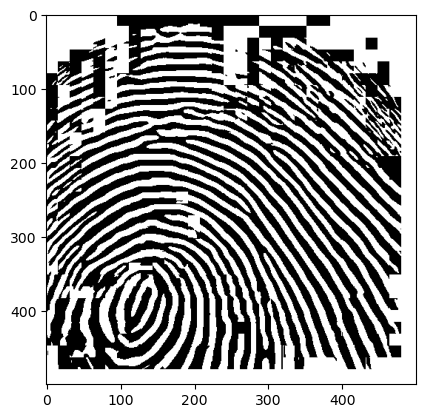

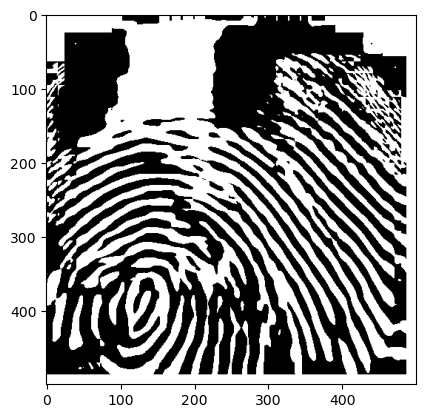

In [174]:

plt.imshow(binarize(sa))
plt.show()
plt.imshow(binaraization(sa))


In [32]:
test_gt_set = gt_images[:300]

In [33]:
binaray_test_gt_set = fingerprint_pipeline(test_gt_set[:10])
plt.imshow(binaray_test_gt_set[6], cmap='gray')

C:\Users\USER\AppData\Local\Temp\ipykernel_6032\1670034409.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_rows = np.int(blksze * np.ceil((np.float(rows)) / (np.float(blksze))))
C:\Users\USER\AppData\Local\Temp\ipykernel_6032\1670034409.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and gu

NameError: name 'img_normalised' is not defined

C:\Users\USER\AppData\Local\Temp\ipykernel_4392\3987086767.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ySobel = np.array(sobelOperator).astype(np.int)
C:\Users\USER\AppData\Local\Temp\ipykernel_4392\3987086767.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

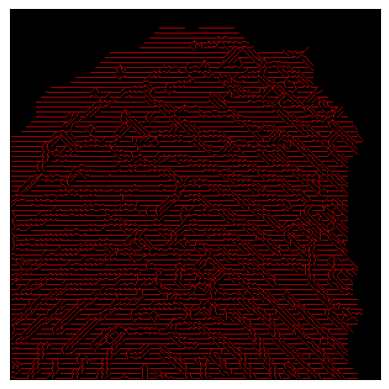

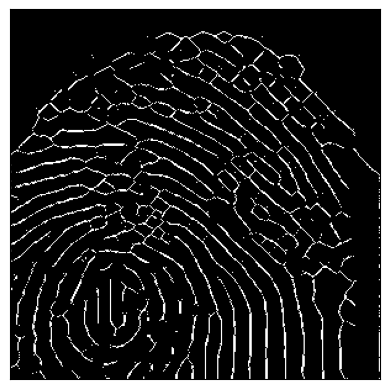

In [186]:

def get_line_ends(i, j, W, tang):
    if -1 <= tang and tang <= 1:
        begin = (i, int((-W/2) * tang + j + W/2))
        end = (i + W, int((W/2) * tang + j + W/2))
    else:
        begin = (int(i + W/2 + W/(2 * tang)), j + W//2)
        end = (int(i + W/2 - W/(2 * tang)), j - W//2)
    return (begin, end)

def visualize_angles(im, mask, angles, W):
    (y, x) = im.shape
    result = cv2.cvtColor(np.zeros(im.shape, np.uint8), cv2.COLOR_GRAY2RGB)
    mask_threshold = (W-1)**2
    for i in range(1, x, W):
        for j in range(1, y, W):
            radian = np.sum(mask[j - 1:j + W, i-1:i+W])
            if radian > mask_threshold:
                tang = math.tan(angles[(j - 1) // W][(i - 1) // W])
                (begin, end) = get_line_ends(i, j, W, tang)
                cv2.line(result, begin, end, color=150)

    cv2.resize(result, im.shape, result)
    return result

_,_,mask = segmentation_maksed_thresholding(binaray_test_gt_set[5])
angle =  calculate_angles(binaray_test_gt_set[5],3)
display_image(visualize_angles(binaray_test_gt_set[5],mask,angle,4))
display_image(binaray_test_gt_set[5])


In [63]:
plt.imshow(thinning_easy_imgs_cr[5])

NameError: name 'thinning_easy_imgs_cr' is not defined

In [ ]:
thinning_mid_imgs_cr = fingerprint_pipeline(mid_imgs_cr[:500])
thinning_hard_imgs_cr = fingerprint_pipeline(hard_imgs_cr[:500])



In [ ]:
thinning_easy_imgs_obl = fingerprint_pipeline(easy_imgs_obl[:500])
thinning_mid_imgs_obl = fingerprint_pipeline(mid_imgs_obl[:500])
thinning_imgs_obl = fingerprint_pipeline(hard_imgs_obl[:500])

In [ ]:
thinning_easy_imgs_zcut=fingerprint_pipeline(easy_imgs_zcut[:500])
thinning_mid_imgs_zcut = fingerprint_pipeline(mid_imgs_zcut[:500])
thinning_hard_imgs_zcut = fingerprint_pipeline(hard_imgs_zcut[:500])

thinning_gt_easy_zcut = fingerprint_pipeline(gt_easy_zcut[:500])
thinning_gt_easy_obl = fingerprint_pipeline(gt_easy_obl[:500])
thinning_gt_easy_cr = fingerprint_pipeline(gt_easy_cr[:500])

thinning_gt_mid_zcut =  fingerprint_pipeline(gt_mid_zcut[:500])
thinning_gt_mid_obl =  fingerprint_pipeline(gt_mid_obl[:500])
thinning_gt_mid_cr =  fingerprint_pipeline(gt_mid_cr[:500])

thinning_gt_hard_zcut = fingerprint_pipeline(gt_hard_zcut[:500])
thinning_gt_hard_cr = fingerprint_pipeline(gt_hard_cr[:500])
thinning_gt_hard_obl = fingerprint_pipeline(gt_hard_obl[:500])

In [ ]:
#hard_imgs_zcut = fingerprint_pipeline(hard_imgs_zcut)
#equalized_img = cv2.equalizeHist(gt_thinnigs[1])
test  = binarise(easy_imgs_cr[3])

plt.imshow(thinning_gt_easy_obl[0],cmap='gray')
plt.show()
plt.imshow(test,cmap='gray')

In [ ]:
plt.imshow(easy_imgs_obl[0],cmap='gray')


In [ ]:
## 노이즈 제거를 위해 썼지만 효과가 별로였음
## 아마도 이미지 크기가 너무 작아 모폴로지 연산이 필요이상의 엣지 정보를 다 날려버림
# kernel = np.ones((2,2), np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('Original Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## thinng 이미지를 후처리 해주기 위한 segmentation code 하지만 잘 되지 않았다.

# # Load thinned fingerprint image
# img_thin = gt_thinnigs[1]

# # Define region growing function
# def region_growing(img, seed):
#     # Create output image
#     img_out = np.zeros_like(img)
#     # Set seed pixel value as output value
#     img_out[seed[0], seed[1]] = 255
#     # Define neighborhood
#     neighborhood = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
#     # Define threshold
#     threshold = 1
#     # Define queue for storing pixel coordinates to be processed
#     queue = []
#     queue.append(seed)
#     # Loop until queue is empty
#     while queue:
#         # Pop first element from queue
#         pixel = queue.pop(0)
#         # Check neighbors
#         for i in range(4):
#             # Compute neighbor coordinates
#             neighbor = pixel + neighborhood[i]
#             # Check if neighbor is inside image bounds
#             if (neighbor[0] < 0 or neighbor[0] >= img.shape[0] or
#                 neighbor[1] < 0 or neighbor[1] >= img.shape[1]):
#                 continue
#             # Compute difference between neighbor and seed pixel value
#             diff = abs(int(img[neighbor[0], neighbor[1]]) -
#                        int(img[seed[0], seed[1]]))
#             # Check if difference is below threshold and pixel is unmarked
#             if diff < threshold and img_out[neighbor[0], neighbor[1]] == 0:
#                 # Set output pixel value
#                 img_out[neighbor[0], neighbor[1]] = 255
#                 # Add neighbor to queue
#                 queue.append(neighbor)
#     return img_out

# # Define seed pixel
# seed = (45, 85)

# # Segment image using region growing
# img_seg = region_growing(img_thin, seed)

# # Display result
# cv2.imshow('Segmented Fingerprint', img_seg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Feature Extraction


- cornerHarris를 이용한 특징점 검출 및 이미지 매칭 
- Cross Counter를 통한 특징점 검출 및 이미지 매칭
- 


In [ ]:
from itertools import combinations
import math
import cv2
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.spatial import distance



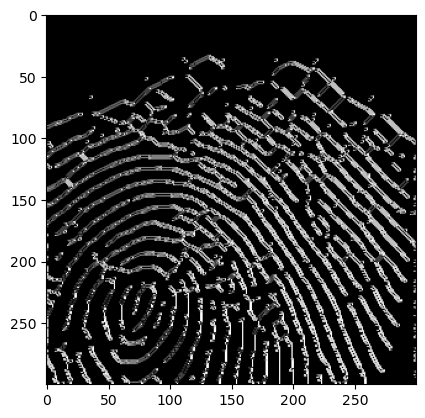

In [187]:
# Load fingerprint image
img = binaray_test_gt_set[2]
# Compute gradient using Sobel operator
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute magnitude and orientation
magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
orientation = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

# Normalize orientation values to range between 0 and 180 degrees
orientation[orientation < 0] += 180

plt.imshow(orientation,cmap='gray')


In [188]:
import matplotlib.pyplot as plt

# Feature extraction: extract minutiae points
def extract_minutiae(img):
    # Thinning the image using Zhang-Suen algorithm
    # Detect minutiae points using a Harris corner detector
    corners = cv2.cornerHarris(img, blockSize=3, ksize=3,k= 0.04)
    corners_norm = cv2.normalize(corners, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    _, corners_thresh = cv2.threshold(corners_norm, 128, 255, cv2.THRESH_BINARY)

    # Convert the coordinates of the detected points to a numpy array
    points = np.argwhere(corners_thresh == 255).astype(np.float32)

    # Visualize the detected points on the image
    #keypoints = [cv2.KeyPoint(x, y, 1) for x, y in points]
    # img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, None)

    return points   #, img_with_keypoints

def match_minutiae(minutiae1, minutiae2):
    distances = []
    for point1 in minutiae1:
        best_distance = float('inf')
        for point2 in minutiae2:
            distance = np.linalg.norm(point1 - point2)
            if distance < best_distance:
                best_distance = distance
        distances.append(best_distance)
    return np.mean(distances)


# Extract the minutiae points and visualize them on both images
temp =50
img_temp = None
collect_count = 0

gt_easy_obl_minutiae_harris = []
easy_obl_minutiae_harris = []

for i in binaray_test_gt_set :
    minutiae = extract_minutiae(i)
    easy_obl_minutiae_harris.append(minutiae)

for i in binaray_test_gt_set :
    minutiae = extract_minutiae(i)
    gt_easy_obl_minutiae_harris.append(minutiae)   




# for i,tg in enumerate(thinning_gt_easy_obl) :
#     minutiae1 = extract_minutiae(tg)
#     best_match_idx = -1

#     for j,easy_img in enumerate(thinning_easy_imgs_obl) :
#         easy_minutiae = extract_minutiae(easy_img)
#         # Compare the two fingerprints using the Euclidean distance
#         distance = match_minutiae(minutiae1, easy_minutiae)
#         if temp >distance :
#             temp =distance
#             best_match_idx = j
#     if i == best_match_idx :
#         collect_count +=1
#     temp =50

#Feature comparison: calculate the Euclidean distance between corresponding points


# Matching decision: check if the distance is within a certain threshold
# threshold = 5.0
# if temp < threshold:
#     print('The two fingerprints match')
# else:
#     print('The two fingerprints do not match')

# # Display the images with keypoints using matplotlib
# fig, ax = plt.subplots(1, 2, figsize=(10,10))
# ax[0].imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
# ax[1].imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
# plt.show()

In [189]:
for i,gt_minutiae in enumerate(gt_easy_obl_minutiae_harris) :
    best_match_idx = -1

    for j,easy_minutiae in enumerate(easy_obl_minutiae_harris) :
        # Compare the two fingerprints using the Euclidean distance
        distance = match_minutiae(gt_minutiae, easy_minutiae)
        if temp >distance :
            temp =distance
            best_match_idx = j
    if i == best_match_idx :
        collect_count +=1
    temp =50
    print(i)

#Feature comparison: calculate the Euclidean distance between corresponding points


0
1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [190]:
#sift matching and score and acc


gt_imgs_orl_des =[]
easy_imgs_orl_des= []

def sift_xfetures2d_make_des(img) :
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
   

    return kp,des

zero_cp_gt = []
zero_cp_easy =[]
count =0
for gt_img_orl , easy_img_orl in zip(binaray_test_gt_set,binaray_test_gt_set) :
    kp1,gt_des = sift_xfetures2d_make_des(gt_img_orl)
    if kp1 == () :
        zero_cp_gt.append(count)
    gt_imgs_orl_des.append([kp1,gt_des])

    kp2,easy_des = sift_xfetures2d_make_des(easy_img_orl)
    if kp2 == () :
        zero_cp_easy.append(count)
    easy_imgs_orl_des.append([kp2,easy_des])

    count+=1


# # Set FLANN parameters
# index_params = dict(algorithm=0, trees=5)
# search_params = dict(checks=50)

# # Initialize FLANN matcher
# flann = cv2.FlannBasedMatcher(index_params, search_params)

# # Loop through the fingerprint images in the list
# best_score = 0
# best_match = None
# collect_count =0
# for i, des1 in enumerate(gt_imgs_orl_des):  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
#     best_match_idx =-1
#     for j, des2 in enumerate(easy_imgs_orl_des) :

#         # Match the descriptors using FLANN
#         matches = flann.knnMatch(des1[1], des2[1], k=2)

#         # Apply ratio test to select good matches
#         good_matches = []
#         for m, n in matches:
#             if m.distance < 0.7 * n.distance:
#                 good_matches.append(m)

#         # Calculate the score
#         score = len(good_matches) / max(len(des1[0]), len(des2[0])) * 100

#         # Check if the current image is the best match so far
#         if score > best_score:
#             best_score = score
#             best_match_idx =j
#     if i==best_match_idx :
#         collect_count+=1


# Draw the best match and show the score
# match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
# plt.imshow(match_img)
# plt.show()
# print(f'Best match score: {best_score:.2f}%')
# cv2.imshow('Best match', match_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [191]:
# Set FLANN parameters
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Loop through the fingerprint images in the list
best_score = 0
best_match = None
collect_count =0
for i, des1 in enumerate(binaray_test_gt_set):  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
    best_match_idx =-1
    for j, des2 in enumerate(binaray_test_gt_set) :

        # Match the descriptors using FLANN
        matches = flann.knnMatch(des1[1], des2[1], k=2)

        # Apply ratio test to select good matches
        good_matches = []
        for m, n in matches:
            if m.distance < 5* n.distance:
                good_matches.append(m)

        # Calculate the score
        score = len(good_matches) / max(len(des1[0]), len(des2[0])) * 100

        # Check if the current image is the best match so far
        if score > best_score:
            best_score = score
            best_match_idx =j

    print(best_match_idx)         
    if i==best_match_idx :
        collect_count+=1
    best_score = 0

# # Draw the best match and show the score
# match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
# plt.imshow(match_img)
# plt.show()
# print(f'Best match score: {best_score:.2f}%')
# cv2.imshow('Best match', match_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

error: OpenCV(4.6.0) C:\b\abs_d8ltn27ay8\croot\opencv-suite_1676452046667\work\modules\flann\src\miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'cv::flann::buildIndex_'
> type=0
> 

In [ ]:
collect_count

In [ ]:
collect_count

In [ ]:
# SIFT 객체 생성
sift = cv2.SIFT_create()

# 특징점 검출
kp = sift.detect(thinning_gt_easy_cr[0], None)
kp2 = sift.detect(thinning_easy_imgs_cr[0],None)
# 특징점 그리기
img_kp = cv2.drawKeypoints(thinning_gt_easy_cr[0], kp, None)
img_kp2 = cv2.drawKeypoints(thinning_easy_imgs_cr[0], kp2 , None)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0][0].imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
ax[0][1].imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
ax[1][0].imshow(cv2.cvtColor(img_kp2, cv2.COLOR_BGR2RGB))
ax[1][1].imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
plt.imshow(thinning_gt_easy_cr[0])

In [ ]:

# Load the thinned fingerprint images
img1 =thinning_gt_easy_cr[0]

# Initialize the SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find keypoints and descriptors for the first image
kp1, des1 = sift.detectAndCompute(img1, None)

# Set FLANN parameters
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Loop through the fingerprint images in the list
best_score = 0
best_match = None
for img in thinning_easy_imgs_cr[:100]:  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
    img2 = img

    # Find keypoints and descriptors for the second image
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match the descriptors using FLANN
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Calculate the score
    score = len(good_matches) / max(len(kp1), len(kp2)) * 100

    # Check if the current image is the best match so far
    if score > best_score:
        best_score = score
        best_match = img2

# Draw the best match and show the score
match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
plt.imshow(match_img)
plt.show()
print(f'Best match score: {best_score:.2f}%')
cv2.imshow('Best match', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

# Load the thinned fingerprint images
img1 = gt_thinnings[0]

# Initialize the SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find keypoints and descriptors for the first image
kp1, des1 = sift.detectAndCompute(img1, None)

# Set FLANN parameters
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Loop through the fingerprint images in the list
best_score = 0
best_match = None
for img in easy_thinnings[:100]:  # Assumes fingerprint2_thinned.png to fingerprint5_thinned.png exist
    img2 = img

    # Find keypoints and descriptors for the second image
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match the descriptors using FLANN
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Calculate the score
    score = len(good_matches) / max(len(kp1), len(kp2)) * 100

    # Check if the current image is the best match so far
    if score > best_score:
        best_score = score
        best_match = img2

# Draw the best match and show the score
plt.imshow(img1,)
match_img = cv2.drawMatches(img1, kp1, best_match, kp2, good_matches, None)
plt.imshow(match_img)
plt.show()
print(f'Best match score: {best_score:.2f}%')
cv2.imshow('Best match', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
minutiae_base = process_minutiae(gt_thinnings[0])
plot_minutiae(gt_thinnings[0], minutiae_base, size=8)

minutiae_test = process_minutiae(easy_thinnings[0])
plot_minutiae(easy_thinnings[0], minutiae_test, size=8)

In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def extract_minutiae(image: np.array):
    """
    Crossing number technique for minutiae extraction from skeletonised binarised images 
    Based on http://airccse.org/journal/ijcseit/papers/2312ijcseit01.pdf
    Requires binarised image array with integer values in [0, 1]. Where 1 is ridge.
    Args:
        image (np.array): Image as a numpy array - 1 channel gray-scale, with white background
    Returns:
        list: [terminations, bifurcations] - extracted from the given image. 
                    terminations (list) - tuple coordinates for the location of a ridge termination
                    bifurcations (list) - tuple coordinates for the location of a ridge bifurcation
    """

    # Index order list - defines the order in which the pixels in a 3x3 frame are considered.
    idx = [(1, -1), (0, -1), (0, 1), (0, 0), (1, 0), (-1, 0), (-1, 1), (-1, -1), (1, -1)]

    debug = False

    height, width = image.shape

    # Store all minutiae
    bifurcations = []
    terminations = []

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # 3x3 frame extraction based on the previous, current and next values on x and y axis.
            frame = image[i - 1: i + 2, j - 1: j + 2]

            # Custom minutiae detection function.
            # Control for pixels found in the middle of the frame.
            # Once identified, it counts filled pixels separated by at least 1 empty pixel.
            pixel_list = [frame[idx[i]] * (1 - frame[idx[i + 1]]) for i in range(len(idx) - 1)]
            pixel_sum = frame[1, 1] * sum(pixel_list)

            # Based on http://airccse.org/journal/ijcseit/papers/2312ijcseit01.pdf
            # pixel_sum = .5 * sum([abs(frame[idx[i]] - frame[idx[i + 1]]) for i in range(len(indices) - 1)])

            if pixel_sum == 1:
                # Termination
                if debug:
                    # Displays a larger frame for debugging purposes.
                    print(f'Termination: {i}, {j}')
                    display_image(image[i - 2: i + 3, j - 2: j + 3])

                # Add termination coordinates
                terminations.append((i, j))

            elif pixel_sum == 3:
                # Bifurcation
                if debug:
                    # Displays a larger frame for debugging purposes.
                    print(f'Bifurcation: {i}, {j}')
                    display_image(image[i - 2: i + 3, j - 2: j + 3])

                # Add bifurcation coordinates
                bifurcations.append((i, j))

    return terminations, bifurcations


def clean_minutiae(image: np.array, minutiae: list) -> list:
    """
    Post-processing
    Remove minutiae identified on the outer terminations of the image.
    We identify outer minutiae as follows: For each type of minutia, we check its quadrant.
    If there are no other full pixels to both the closest sides to an edge on both x and y coord
    That minutiae is discraded.
    Checks location and other pixel values to the sides of the minutiae.
    Outputs list of cleaned minutiae.
    Args:
        image (np.array): Image to be analysed for cleaning borderline minutiae.
        minutiae  (list): Minutiae represented as a list of coordinate tuples (2d: x, y))
    Returns:
        list: Coordinate as tuple list of minutiae that are not found at the image bordering ridge terminations.
    """

    height, width = image.shape

    minutiae_clean = []
    for x, y in minutiae:
        # If there are directions in which the minutiae with x and y coordinates has only empty
        # pixels, that we label the minutiae as an image border and discard it.
        if (image[x, :y].sum() > 0) and (image[x, y + 1:].sum() > 0) and (image[:x, y].sum() > 0) and \
                (image[x + 1:, y].sum() > 0):
            minutiae_clean.append((x, y))

    return minutiae_clean


def extract_tuple_profile(distances: list, m: tuple, minutiae: list) -> list:
    """
    Explores tuple profile. A tuple is a set of minutiae that are found close together.
    Args:
        distances (np.array): Distances between a tuple and its neighbours. Should be used for computing the tuple profile.
        m            (tuple): The base minutiae from which the distances are computed.
        minutiae      (list): List of tuple-like coordinates for all minutiae.
    Returns:
        list: [ratios, angles] - A pair of all angles (list) and all ratios (list) identified for the given tuple.
    """

    # Closest minutiae to the current minutiae
    closest_distances = sorted(distances)[1:6]
    closest_indices = [list(distances).index(d) for d in closest_distances]
    closest_minutiae = [minutiae[i] for i in closest_indices]

    # Unique pair ratios.
    # The 10 pairs used for computing the ratios
    # i-i1 : i-i2, i-i1 : i-i3, i-i1 : i-i4, i-i1 : i-i5,
    # i-i2 : i-i3, i-i2 : i-i4, i-i2 : i-i5
    # i-i3 : i-i4, i-i3 : i-i5
    # i-i4 : i-i5
    unique_pairs = list(combinations(closest_distances, 2))
    # 2 decimal rounded ratios of max of the two distances divided by their minimum.
    compute_ratios = [round(max(p[0], p[1]) / min(p[0], p[1]), 2) for p in unique_pairs]

    # Angle computation.
    minutiae_combinations = list(combinations(closest_minutiae, 2))

    # Angle between the segments drawn from m to the two other minutae with varying distances.
    minutiae_angles = [round(extract_angle((m, x), (m, y)), 2) for x, y in minutiae_combinations]

    return [compute_ratios, minutiae_angles]


def process_minutiae(image: np.array):
    """
    Image processing into minutiae - bifurcations
    Args:
        image   (np.array): Image in 1 channel gray-scale.
    Returns:
        list:     minutiae list containing minutiae coordinates (x, y)
    """

    # Extract minutiae
    terminations, bifurcations = extract_minutiae(image)

    # Post-processing border minutiae removal.
    terminations = clean_minutiae(image, terminations)
    bifurcations = clean_minutiae(image, bifurcations)

    return terminations + bifurcations


def generate_tuple_profile(minutiae: list) -> dict:
    """
    Compute the distance matrix from each minutiae to the rest.
    Args:
        minutiae (list): List of coordinate tuples.
    Returns:
        dict: Tuple profile with all angles and ratios.
    """

    distance_matrix = np.array([[euclidian_distance(i, j) for i in minutiae] for j in minutiae])

    tuples = {}

    for i, m in enumerate(minutiae):
        # When comparing two tuple profiles, one from base and one from test image,
        # they are the same if at least 2 ratios match (and angles).

        # This means that for the tuple profile i is found in a second image under a
        # different tuple's profile.

        # Angles are given a +/- 3.5 degree range to match. To match sourcing device discrepancies.
        ratios_angles = extract_tuple_profile(distance_matrix[i], m, minutiae)
        tuples[m] = np.round(ratios_angles, 2)

    return tuples


def minutiae_points(image: np.array):
    """
    Minutiae as key points.
    """

    # ORB discretises the angle to increments of 2 * pi / 30 (12 degrees) and construct a lookup table of precomputed
    # BRIEF patterns. As long as the keypoint orientationis consistent across views, the correct set of points S
    # will be used to compute its descriptor.
    orb = cv2.ORB_create()

    # Use ORB to detect keypoints.
    points = orb.detect(image)

    # # Use minutiae extracted via crossing numbers technique as keypoints.
    # minutiae = process_minutiae(image)
    # points = [cv2.KeyPoint(y, x, 1) for (x, y) in minutiae]

    # Describe and compute descriptor extractor
    keypoints, descriptors = orb.compute(image, points)

    return keypoints, descriptors


def plot_minutiae_tree(image: np.array, points: list, size: int = 5, node_size: int = 20, graph_color: str = 'blue'):
    """
    Intakes a list of tuple-coordinates that should be linked together via an edge. Plots them on
    image    (np.array): Image array that should be plotted - 1 channel gray-scale
    size          (int): Size of the displayed figure. Square figure with side = size.
    points       (list): List of minutiae coordinates that should be chained together.
    node_size     (int): Graph node size if graph 'G' is given.
    graph_color   (str): Colour of the graph nodes and edges.
    """

    plt.figure(figsize=(size, size))
    plt.imshow(image)
    plt.grid(False)

    G = nx.Graph()

    # Create nodes for each coordinate pair
    for i, coord in enumerate(points):
        G.add_node(i, pos=(coord[1], coord[0]))

    # Create edges between subsequent nodes.
    G.add_edges_from([(i, i + 1) for i in range(len(points[:-1]))])

    nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=node_size, color=graph_color,
            edge_color=graph_color)

    plt.show()


def plot_minutiae(image: np.array, terminations: list = None, bifurcations: list = None, size: int = 5) -> None:
    """
    Plots minutiae as circles on the given image.
    Args:
        image    (np.array): Image array that should be plotted.
        terminations (list): Terminations that should be plotted. Each list element should contain a tuple with the
                                minutiae coordinates.
        bifurcations (list): Bifurcations that should be plotted. Each list element should contain a tuple with the
                                minutiae coordinates.
        size          (int): Size of the displayed figure. Square figure with side = size.
    """

    if bifurcations is None and terminations is None:
        raise Exception("INFO: No 'terminations' or 'bifurcations' parameter given. Nothing to plot.")
    else:
        fig = plt.figure(figsize=(size, size))
        plt.imshow(image,cmap='gray')
        plt.grid(False)

    if terminations is not None:
        print(terminations)
        print("INFO: Plotting terminations\' coordinates")
        for y, x in terminations:
            termination = plt.Circle((x, y), radius=5, linewidth=2, color='red', fill=False)
            fig.add_subplot(111).add_artist(termination)

    if bifurcations is not None:
        print(bifurcations)

        print("INFO: Plotting bifurcations\' coordinates")

        for y, x in bifurcations:
            bifurcation = plt.Circle((x, y), radius=5, linewidth=2,
                                     color='blue', fill=False)

            fig.add_subplot(111).add_artist(bifurcation)

In [ ]:
# Define function for crossing number algorithm
def crossing_number(img):
    cn_img = np.zeros_like(img)
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if img[i, j] == 0:
                continue
            cn = 0
            if img[i-1, j] == 255:
                cn += 1
            if img[i-1, j+1] == 255:
                cn += 1
            if img[i, j+1] == 255:
                cn += 1
            if img[i+1, j+1] == 255:
                cn += 1
            if img[i+1, j] == 255:
                cn += 1
            if img[i+1, j-1] == 255:
                cn += 1
            if img[i, j-1] == 255:
                cn += 1
            if img[i-1, j-1] == 255:
                cn += 1
            if cn == 1:
                cn_img[i, j] = 255
            elif cn == 3:
                cn_img[i, j] = 128
            elif cn == 4:
                cn_img[i, j] = 64
    return cn_img

# Load fingerprint image
img_thin = gt_thinnings[0]

# Extract features using crossing number
cn_img = crossing_number(img_thin)

# Create color image for visualization
color_img = cv2.cvtColor(cn_img, cv2.COLOR_GRAY2BGR)
color_img[np.where(cn_img == 255)] = [0, 0, 255]   # Ending points (red)
color_img[np.where(cn_img == 128)] = [0, 255, 0]   # Bifurcation points (green)
color_img[np.where(cn_img == 64)] = [255, 0, 0]    # Cross points (blue)

test = cv2.cvtColor(img_thin,cv2.COLOR_GRAY2RGB)
plt.imshow(color_img)
plt.show()
plt.imshow(img_thin,cmap='gray')
plt.show()
combined_img = cv2.addWeighted(test, 0.1, color_img, 0.9, 0)

# color_img[np.where((color_img == [0, 0, 255]).all(axis=2))] = [0, 255, 0]

# Display result
plt.imshow(combined_img)
plt.show()
# Display result

In [ ]:

def get_counter_crossing_points(img: np.ndarray) -> list:
    """
    Counter Crossing 알고리즘을 사용하여 지문 이미지에서 특징점을 찾아 반환합니다.
    
    Args:
        img (numpy.ndarray): Thinning이 된 1채널(Gray) 지문 이미지.
    
    Returns:
        list: Counter Crossing 알고리즘을 통해 찾은 특징점 리스트.
    """
    # 커널 생성 (Counter Crossing을 위한)
    kernel = np.array([[1,1,1],[1,0,1],[1,1,1]], dtype=np.uint8)
    
    # Counter Crossing
    img_cc = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel)
    
    # contour 찾기
    contours,_ = cv2.findContours(img_cc, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour 중심점 찾기
    cc_points = []
    for contour in contours:
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            cc_points.append((cx, cy))
    
    return cc_points

def match_fingerprints(img1: np.ndarray, img2: np.ndarray) -> float:
    """
    두 개의 지문 이미지를 비교하여 일치율을 반환합니다.
    
    Args:
        img1 (numpy.ndarray): 1채널(Gray) 지문 이미지.
        img2 (numpy.ndarray): 1채널(Gray) 지문 이미지.
        
    Returns:
        float: 지문 이미지의 일치율.
    """
    
    # Counter Crossing
    cc_points1 = get_counter_crossing_points(img1)
    cc_points2 = get_counter_crossing_points(img2)
    
    # BFMatcher 객체 생성
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    
    # 매칭
    matches = bf.match(np.array(cc_points1), np.array(cc_points2))
    
    # 일치율 계산
    similarity = sum([match.distance for match in matches]) / len(matches)
    
    return similarity

In [ ]:
match_fingerprints(gt_images[0],altered_easy_images[0])

In [ ]:

def get_counter_crossing_points(img):
    img_cc = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if img[i,j] == 0:
                continue
            p2 = img[i-1,j]
            p3 = img[i-1,j+1]
            p4 = img[i,j+1]
            p5 = img[i+1,j+1]
            p6 = img[i+1,j]
            p7 = img[i+1,j-1]
            p8 = img[i,j-1]
            p9 = img[i-1,j-1]
            C = (not p2 and (p3 or p4)) + (not p4 and (p5 or p6)) + \
                (not p6 and (p7 or p8)) + (not p8 and (p9 or p2))
            N1 = (p9 or p2) + (p3 or p4) + (p5 or p6) + (p7 or p8)
            N2 = (p2 or p3) + (p4 or p5) + (p6 or p7) + (p8 or p9)
            N = min(N1, N2)
            if C == 1 and (2 <= N <= 3):
                img_cc[i,j] = 255
    contours, _ = cv2.findContours(img_cc, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cc_points = []
    for contour in contours:
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            cc_points.append([cx, cy])
    return cc_points

# Load the images


# Apply Thinning
img1_thin = gt_thinnings[0]
img2_thin = easy_thinnings[0]

# Get Counter Crossing Points
cc_points1 = get_counter_crossing_points( gt_thinnings[0])
cc_points2 = get_counter_crossing_points(easy_thinnings[0])


print(cc_points1)
# Draw the Counter Crossing Points on the images
for point in cc_points1:
    cv2.circle(img1_thin, (point[0], point[1]), 3, (0, 0, 255), -1)
for point in cc_points2:
    cv2.circle(img2_thin, (point[0], point[1]), 3, (0, 0, 255), -1)

# Display the images
cv2.imshow("Image 1", img1_thin)
cv2.imshow("Image 2", img2_thin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Detect keypoints using crossing number algorithm

def crossing_number(img):
    cn_img = np.zeros_like(img)
    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if img[i, j] == 0:
                continue
            cn = 0
            if img[i-1, j] == 255:
                cn += 1
            if img[i-1, j+1] == 255:
                cn += 1
            if img[i, j+1] == 255:
                cn += 1
            if img[i+1, j+1] == 255:
                cn += 1
            if img[i+1, j] == 255:
                cn += 1
            if img[i+1, j-1] == 255:
                cn += 1
            if img[i, j-1] == 255:
                cn += 1
            if img[i-1, j-1] == 255:
                cn += 1
            if cn == 1:
                cn_img[i, j] = 255
            elif cn == 3:
                cn_img[i, j] = 128
            elif cn == 4:
                cn_img[i, j] = 64
    return cn_img

def get_cn_des(img) : 
    cn_img = crossing_number(img)
    # Create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    # Extract keypoints and descriptors
    kp = []
    cn_des=[]
    for i in range(8, cn_img.shape[0]-8):
        for j in range(8, cn_img.shape[1]-8):
            if cn_img[i,j] != 0:
                # Create keypoint
                kpt = cv2.KeyPoint(j, i, size=10)
                kp.append(kpt)
                # Calculate descriptor
                patch = cn_img[i-8:i+8, j-8:j+8]
                patch = cv2.resize(patch, (16, 16))
                descriptor = sift.compute(patch, [kpt])
                cn_des.append(descriptor[1])

    return kp, cn_des


# 확인하고 싶은 지문 이미지
query_img = gt_thinnigs[7]
#지문 이미지 feature extraction 및 get descripotr 
query_kp, query_des = get_cn_des(query_img)
query_des =np.concatenate(query_des,axis=0)
# Load descriptor list for comparison
descriptor_list = []
for img in easy_thinnings:
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des =get_cn_des(img)
    des = np.concatenate(des,axis=0)
    descriptor_list.append(des)


# Define distance metric for descriptor comparison
def distance_metric(descriptor1, descriptor2, metric_type='euclidean'):
    if metric_type == 'euclidean':
        return np.linalg.norm(descriptor1 - descriptor2)
    elif metric_type == 'manhattan':
        return np.sum(np.abs(descriptor1 - descriptor2))
    else:
        raise ValueError('Unsupported distance metric type')

# # Define query image descriptors
query_descriptors = query_des


# Match descriptors using Euclidean distance
distances = []
for i, descriptor in enumerate(descriptor_list): #디스크립터 리스트 i는 이미지 순서다.
    print(i)
    
    dist = distance_metric(descriptor, query_descriptors, metric_type='euclidean')
    distances.append((dist, i))

# Sort distances by ascending order
distances.sort(key=lambda x: x[0])

# Get the index of the image with the closest match
match_index = distances[0][1]

print(match_index)


# # Compare query image descriptors with descriptor lists of all comparison images
# best_match_index = -1
# best_match_distance = float('inf')
# for i, descriptor_list in enumerate(descriptor_lists):
#     for descriptor in descriptor_list:
#         distance = distance_metric(query_descriptors, descriptor)
#         if distance < best_match_distance:
#             best_match_index = i
#             best_match_distance = distance

# # Print best match index
# print('Best match index:', best_match_index)
# Compare query descriptor to all descriptors in the list
# bf = cv2.BFMatcher()
# matches = []
# for des in descriptor_list:
#     knn_matches = bf.knnMatch(query_des, des, k=2)
#     good_matches = []
#     for m,n in knn_matches:
#         if m.distance < 0.75*n.distance:
#             good_matches.append(m)
#     matches.append(len(good_matches))

# # Find index of image with the most matches
# best_match_idx = matches.index(max(matches))

# # Display the best matching image
# best_match_img = easy_thinnings[best_match_idx]
# plt.imshow(query_img,cmap='gray')
# plt.show()
# plt.imshow(best_match_img,cmap='gray')
# plt.show()
# # cv2.imshow('Best Match', best_match_img)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [ ]:
plt.imshow(easy_thinnings[4])
plt.show()

In [ ]:
# Find contours in the thinned image
contours, hierarchy = cv2.findContours(easy_imgs_cz[1], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# Create an empty array to store minutiae coordinates and types
minutiae = []

# Loop over the contours in the image
for cnt in contours:
    # Initialize empty arrays for bifurcation and ending points
    bif_points = []
    end_points = []

    # Loop over each point in the contour
    for i in range(cnt.shape[0]):
        # Get the current point
        pt = tuple(cnt[i][0])

        # Check if the current point is a bifurcation or ending point
        if img[pt[1], pt[0]] == 255:
            neighbors = img[pt[1]-1:pt[1]+2, pt[0]-1:pt[0]+2]
            count = np.count_nonzero(neighbors == 255)

            if count == 2:
                bif_points.append(pt)
            elif count == 1:
                end_points.append(pt)

                

    # Add the bifurcation and ending points to the minutiae array
    for pt in bif_points:
        minutiae.append({'coord': pt, 'type': 'bifurcation'})

    for pt in end_points:
        minutiae.append({'coord': pt, 'type': 'ending'})

print(minutiae)
# Visualize the minutiae on the original fingerprint image
img_orig = gt_thinnings[1]
for m in minutiae:
    if m['type'] == 'bifurcation':
        cv2.circle(img_orig, m['coord'], 5, (255), 2)
    else:
        cv2.circle(img_orig, m['coord'], 5, (0), 2)

cv2.imshow('Minutiae', img_orig)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 데이터 Write

In [ ]:
def otsu_binarization(img):
    src = img
    th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return dst

In [ ]:
sauvola_path ='E:/study_opencv/fingerprint/preprocess_img/sauvola'
otsu_file_path = 'E:/study_opencv/fingerprint/preprocess_img/otsu/'

In [ ]:
#gt_file_path = ''./data/SOCOFing/Real/100__M_Left_index_finger.BMP'
#altered_file_path './data/socofing/SOCOFing/Altered/Altered-Hard\\100__M_Left_index_finger_CR.BMP'

for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(otsu_file_path,'gt',gt_name.split('/')[-1]),otsu_binarization(gt))
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    cv2.imwrite(os.path.join(otsu_file_path,'medium',easy_name.split('\\')[-1]),otsu_binarization(medium),)
    cv2.imwrite(os.path.join(otsu_file_path,'hard',easy_name.split('\\')[-1]),otsu_binarization(hard))




In [ ]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'easy',easy_name.split('\\')[-1]),otsu_binarization(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'medium',medium_name.split('\\')[-1]),otsu_binarization(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(otsu_file_path,'hard',hard_name.split('\\')[-1]),otsu_binarization(hard))
       

In [ ]:


for gt, easy,medium,hard,gt_name,easy_name,medium_name,hard_name in zip(gt_images, altered_easy_images,altered_medium_images,altered_hard_images,gt_file_path,altered_easy_path,altered_medium_path,altered_hard_path) :
    cv2.imwrite(os.path.join(sauvola_path,'gt',gt_name.split('/')[-1]),sauvola_threshold(gt))
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    cv2.imwrite(os.path.join(sauvola_path,'medium',easy_name.split('\\')[-1]),sauvola_threshold(medium),)
    cv2.imwrite(os.path.join(sauvola_path,'hard',easy_name.split('\\')[-1]),sauvola_threshold(hard))

In [ ]:
for easy , easy_name in zip(altered_easy_images[6000:],altered_easy_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'easy',easy_name.split('\\')[-1]),sauvola_threshold(easy))
    
for medium , medium_name in zip(altered_medium_images[6000:],altered_medium_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'medium',medium_name.split('\\')[-1]),sauvola_threshold(medium))

for hard , hard_name in zip(altered_hard_images[6000:],altered_hard_path[6000:]) :
    cv2.imwrite(os.path.join(sauvola_path,'hard',hard_name.split('\\')[-1]),sauvola_threshold(hard))

#### Gui 생성

### 노이즈 제거


- median filtering
- Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.
- 모폴리지 침식
- 가우시안
- deep-learning model 활용
밑에거는 시간나면 해보자
- Gabor filter : 지문 이미지에서 지문 라인을 강조하는 데 효과적입니다.

Wiener filter : 지문 이미지에서 가우시안 노이즈와 같은 선형 노이즈를 제거하는 데 효과적입니다.

Non-local means filter : 지문 이미지에서 일반적으로 발생하는 노이즈와 가우시안 노이즈를 제거하는 데 효과적입니다.

Morphological filtering : 지문 이미지에서 작은 노이즈를 제거하고 지문 라인을 보정하는 데 효과적입니다.

푸리에 변환(FFT) : 지문 이미지에서 주파수 도메인에서 노이즈를 분리하는 데 효과적입니다.
Median filter : 지문 이미지에서 작은 노이즈를 제거하는 데 효과적입니다.


[]


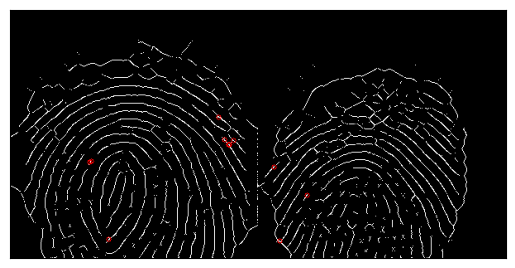

NameError: name 'img1' is not defined

In [208]:
def get_minutiae(img_thin):
    # Perform skeleton pruning to get branch points and ridge lines
    #img_prune = prune_skeleton(img_thin)
    img_thin = (img_thin * 255).astype(np.uint8)

    # Find ridge endings and bifurcations
    ridge_ends, bifurcations = get_minutiae_points(img_thin)

    return ridge_ends, bifurcations


def get_minutiae_points(img_prune):
    # Find ridge endings and bifurcations
    ridge_ends = []
    bifurcations = []
    for i in range(1, img_prune.shape[0]-1):
        for j in range(1, img_prune.shape[1]-1):
            if img_prune[i,j] == 1:
                # 3x3 주변확인을 한 이후 count가 1이면 끝점인지 분기점인지 확인을 함
                neigh = img_prune[i-1:i+2, j-1:j+2]
                count = np.sum(neigh) - 1
                
                if count == 1:
                    # ridge 끝점
                    ridge_ends.append((i,j))
                elif count == 3:
                    # Bifurcation 분기점
                    # 7x7 주변을 보고 1이 11개 이상이면 분기점
                    if np.sum(img_prune[i-2:i+3, j-2:j+3]) >= 9:
                        bifurcations.append((i,j))
    
    return ridge_ends, bifurcations

def match_minutiae(points1, points2, threshold=20):
    # Match minutiae between two images using Euclidean distance threshold
    match_pairs = []
    
    for i in range(len(points1)):
        p1 = points1[i]
        min_dist = float('inf')
        min_j = -1
        
        for j in range(len(points2)):
            p2 = points2[j]
            dist = np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
            
            if dist < min_dist:
                min_dist = dist
                min_j = j
        
        if min_dist < threshold:
            match_pairs.append((i, min_j))

        
    
    return match_pairs

def visualize_minutiae(img, points, color=(0, 0, 255)):
    # Visualize minutiae points on an image
    img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for point in points:
        cv2.circle(img_vis, (point[1], point[0]), 3, 255)
    
    return img_vis
def visualize_matching(img1, points1, img2, points2, match_pairs):
    # Combine two images side by side
    h, w = img1.shape[:2]
    img_combined = np.zeros((h, w*2, 3), dtype=np.uint8)
    img_combined[:, :w] = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img_combined[:, w:] = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # Draw lines between matched minutiae points
    for pair in match_pairs:
        
        p1 = points1[pair[0]]
        p2 = points2[pair[1]]
        p2 = (p2[0], p2[1]+w)  # shift x-coordinate of second point to the right
        cv2.line(img_combined, (p1[1], p1[0]), (p2[1], p2[0]), (0, 255, 0), 1)
    
    # Draw circles around minutiae points
    for point in points1:
        cv2.circle(img_combined, (point[1], point[0]), 3, (0, 0, 255))
    for point in points2:
        point = (point[0], point[1]+w)  # shift x-coordinate of points in second image
        cv2.circle(img_combined, (point[1], point[0]), 3, (0, 0, 255))

    return img_combined

# Load two fingerprint images
img1_thin = binaray_test_gt_set[0]
img2_thin = binaray_test_gt_set[1]

# print(easy_thinnings[1])
# img1m = get_minutiae(img1_thin)
# display_image(np.hstack((visualize_minutiae(img1_thin,img1m[0]),visualize_minutiae(img1_thin,img1m[1]))))
# #display_image(np.hstack((img, img_eq)))

# img1 = gt_thinnings[0]
# img2 = easy_thinnings[0]

# Extract minutiae points from both images
minutiae1 = get_minutiae(img1_thin)
minutiae2 = get_minutiae(img2_thin)

# Match minutiae points between the two images
matches = match_minutiae(minutiae1[1], minutiae2[1])

img1_vis = visualize_minutiae(img1_thin, minutiae1[1], color=(0, 0, 255))
img2_vis = visualize_minutiae(img2_thin, minutiae2[1], color=(0, 0, 255))
print(matches)
for match in matches:
    p1 = minutiae1[1][match[0]]
    p2 = minutiae2[1][match[1]]
    cv2.line(img1_vis, (p1[1], p1[0]), (p2[1], p2[0]), (0, 255, 0), 1)
    cv2.line(img2_vis, (p2[1], p2[0]), (p1[1], p1[0]), (0, 255, 0), 1)

display_image(np.hstack((img1_vis,img2_vis)))


plt.imshow(visualize_matching(img1,minutiae1[1],img2,minutiae2[1],matches))

In [ ]:

def crossing_number(img):
    h, w = img.shape
    cn_img = np.zeros((h, w), dtype=np.uint8)
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if img[i, j] == 0:
                continue
            p2 = int(img[i-1, j])
            p3 = int(img[i-1, j+1])
            p4 = int(img[i, j+1])
            p5 = int(img[i+1, j+1])
            p6 = int(img[i+1, j])
            p7 = int(img[i+1, j-1])
            p8 = int(img[i, j-1])
            p9 = int(img[i-1, j-1])
            cn = (p2 == 0 and p3 == 1) + \
                 (p3 == 0 and p4 == 1) + \
                 (p4 == 0 and p5 == 1) + \
                 (p5 == 0 and p6 == 1) + \
                 (p6 == 0 and p7 == 1) + \
                 (p7 == 0 and p8 == 1) + \
                 (p8 == 0 and p9 == 1) + \
                 (p9 == 0 and p2 == 1)
    return cn_img

plt.imshow(crossing_number(gt_easy_cr[0]),cmap='gray')
test[0]

In [ ]:
neighbor = [(1,0), (1,-1), (0,-1), (-1,-1),
            (-1,0), (-1,1), (0,1), (1,1)]
def get_CN_points(img):
    h, w = img.shape
    CN_points_b = []
    CN_points_e = []
    for i in range(1, h-1):
        for j in range(1, w-1):
            if img[i,j] == 0:
                continue
            CN = 0
            # 8개의 픽셀을 검사하여 Crossing Number를 계산합니다.
            for k in range(8):
                x, y = i + neighbor[k][0], j + neighbor[k][1]
                if img[x,y] == 0:
                    CN += 1
            # Crossing Number가 1이면 끝점, 3이면 분기점으로 인식합니다.
            if CN == 1:
                CN_points_e.append((i,j))
            elif CN == 3:
                CN_points_b.append((i,j))
    return CN_points_e, CN_points_b

#thinning_test = fingerprint_pipeline(gt_easy_obl[:20])
km =thinning_test[12].astype(np.float32) / 255.0
b, e = get_CN_points(thinning_test[-1])
#b1,e1 = get_CN_points(test[2])


plt.imshow(visualize_minutiae(thinning_test[-1],b))

In [ ]:
import cv2
import numpy as np

def crossing_number(img, window_size):
    # Initialize an empty list to hold the minutiae points
    minutiae = []
    
    # Apply a threshold to the image to convert it to binary
    # _, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Iterate over each pixel in the image
    for i in range(window_size, img.shape[0]-window_size):
        for j in range(window_size, img.shape[1]-window_size):
            # Only consider white pixels
            if img[i,j] == 255:
                # Extract the local window around the pixel
                window = img[i-window_size:i+window_size+1, j-window_size:j+window_size+1]
                
                # Compute the crossing number of the window
                cn = 0
                for k in range(1, window.shape[0]-1):
                    for l in range(1, window.shape[1]-1):
                        p1 = window[k-1,l]
                        p2 = window[k+1,l]
                        p3 = window[k,l-1]
                        p4 = window[k,l+1]
                        if (p1 == 0 and p2 == 255) or (p1 == 255 and p2 == 0):
                            cn += 1
                        if (p3 == 0 and p4 == 255) or (p3 == 255 and p4 == 0):
                            cn += 1
                
                # If the crossing number is 1, the pixel is a ridge ending
                if cn == 1:
                    minutiae.append((j,i,1))
                # If the crossing number is 3, the pixel is a bifurcation
                elif cn == 3:
                    minutiae.append((j,i,3))
    
    # Return the list of minutiae points
    return minutiae

# Load the fingerprint image
img = test[3]


# Apply the crossing number algorithm to the image
minutiae = crossing_number(img, 50)
print(minutiae)
# Draw circles at the location of the minutiae points
for point in minutiae:
    x, y, t = point
    if t == 1:
        # Ridge ending
        color = (0, 0, 255)
        radius = 2
    elif t == 3:
        # Bifurcation
        color = (0, 255, 0)
        radius = 3
    cv2.circle(img, (x, y), radius, color, -1)

# Show the result
cv2.imshow('Minutiae Points', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
thinning_test = fingerprint_pipeline(gt_easy_obl[:20])

In [ ]:
img1 = gt_thinnings[0]
img2 = easy_thinnings[0]

sift = cv2.xfeatures2d.SIFT_create()
keypoints_cv2 = [cv2.KeyPoint(x, y, 3) for x, y in minutiae1[0]]
keypoints, descriptors = sift.compute(img1, keypoints_cv2)
keypoints_cv2 = [cv2.KeyPoint(x, y, 3) for x, y in minutiae2[0]]
keypoints2, descriptors2 = sift.compute(img2, keypoints_cv2)
def match_descriptors(descriptors1, descriptors2, threshold=0.7):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < threshold * n.distance:
            good_matches.append([m])
            
    return np.array(good_matches)

In [ ]:
match_descriptors(descriptors,descriptors2)

In [ ]:
def find_bifurcations(img):
    # Find bifurcations in the thinned image
    bifurcations = []
    img = (img * 255).astype(np.uint8)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i, j] == 1:
                # Get the 3x3 neighborhood
                neighborhood = img[i-1:i+2, j-1:j+2]

                # Check if the current pixel is a bifurcation
                if np.sum(neighborhood) == 4:
                    # Find the two branches that meet at the bifurcation
                    rows, cols = np.where(neighborhood == 1)
                    branch1 = (rows[0], cols[0])
                    branch2 = (rows[1], cols[1])
                    bifurcations.append((i, j, branch1, branch2))

    return bifurcations

find_bifurcations(gt_thinnings[0])

# opencv interface를 활용하여 비교해보기 

# median filter
dst = cv2.medianBlur(src, 3) #meadian filtering 3x3
# gausian filter



In [ ]:

# gausian filter
# 이미지를 로드합니다.
img = cv2.imread('noisy_image.jpg')

# 가우시안 필터를 적용합니다.
img_filtered = cv2.GaussianBlur(img, (5, 5), 0)

# 결과 이미지를 출력합니다.
cv2.imshow('Filtered Image', img_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import sys
from PySide6.QtWidgets import QApplication, QLabel

app = QApplication(sys.argv)
label = QLabel("Hello World!")
label.show()
app.exec()

In [32]:
import math

import numpy as np

import scipy
from scipy import ndimage, signal

import warnings
warnings.simplefilter("ignore")

import cv2
cv2.ocl.setUseOpenCL(False)

def enhance_image(image: np.array, block_orientation: int = 16, threshold: float = 0.1,
                  sigma_gradient: int = 1, sigma_block: int = 7, sigma_orientation: int = 7,
                  block_frequency: int = 38, window_size: int = 5, min_wave_length: int = 5,
                  max_wave_length: int = 15, padding: int = None, skeletonise: bool = True):
    """
    Image enhancement using gabor filters based on ridge orientation. 
    Adjusted from https: / / github.com / Utkarsh-Deshmukh / Fingerprint-Enhancement-Python
    Based on the paper: Hong, L., Wan, Y., and Jain, A. K. '
    Fingerprint image enhancement: Algorithm and performance evaluation'. 
    IEEE Transactions on Pattern Analysis and Machine Intelligence 20, 8 (1998), pp 777-789.
    License: BSD 2
    
    """

    # CLAHE adjusted image - histogram equalisation.
    img_clahe = apply_clahe(image)

    # Padding image for applying window frequency mask.
    if padding is not None:
        top, bottom, left, right = [padding] * 4
        img_clahe = cv2.copyMakeBorder(img_clahe, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)

    # Normalise images
    img_normalised, mask = ridge_segment(img_clahe, block_orientation, threshold)

    # Pixel orientation
    img_orientation = ridge_orient(img_normalised, sigma_gradient, sigma_block, sigma_orientation)

    # Ridge frequency
    img_frequency, med = ridge_frequency(img_normalised, mask, img_orientation, block_frequency, window_size,
                                         min_wave_length, max_wave_length)

    # Gabor filter
    image_filtered = ridge_filter(img_normalised, img_orientation, med * mask, .65, .65)

    image_enhanced = (image_filtered < -3)

    if skeletonise:
        # Applies image thinning and sets background to white.
        image_enhanced = thin_image(image_enhanced)
        image_enhanced = clean_points(image_enhanced)

    # Normalising image and processing background - and ridges.
    # image_enhanced = image_enhanced // image_enhanced.max()  # [0, 1] values

    # Invert colours if the background is dark.
    # image_enhanced = swap(image_enhanced) if image_enhanced.mean() < .5 else image_enhanced
    # image_enhanced = image_enhanced.astype('uint8')

    return image_enhanced.astype('uint8')


def ridge_orient(image: np.array, sigma_gradient: int, sigma_block: int, sigma_orientation: int):
    """
    Extracts the orientation of the ridges. 
    """

    # Image gradients.
    size = np.fix(6 * sigma_gradient)

    if np.remainder(size, 2) == 0:
        size = size + 1

    gauss = cv2.getGaussianKernel(np.int(size), sigma_gradient)

    # Gradient of Gaussian
    f = gauss * gauss.T
    fy, fx = np.gradient(f)

    Gx = signal.convolve2d(image, fx, mode='same')
    Gy = signal.convolve2d(image, fy, mode='same')

    Gxx = np.power(Gx, 2)
    Gyy = np.power(Gy, 2)
    Gxy = Gx * Gy

    # Smooth the covariance data to perform a weighted summation of the data.    

    size = np.fix(6 * sigma_block)

    gauss = cv2.getGaussianKernel(np.int(size), sigma_block)
    f = gauss * gauss.T

    Gxx = ndimage.convolve(Gxx, f)
    Gyy = ndimage.convolve(Gyy, f)
    Gxy = 2 * ndimage.convolve(Gxy, f)

    # Analytic solution of principal direction
    denom = np.sqrt(np.power(Gxy, 2) + np.power((Gxx - Gyy), 2)) + np.finfo(float).eps

    # Sine and cosine of doubled angles
    sin2theta = Gxy / denom
    cos2theta = (Gxx - Gyy) / denom

    if sigma_orientation:

        size = np.fix(6 * sigma_orientation)

        if np.remainder(size, 2) == 0:
            size = size + 1

        gauss = cv2.getGaussianKernel(np.int(size), sigma_orientation)

        f = gauss * gauss.T
        cos2theta = ndimage.convolve(cos2theta, f)  # Smoothed sine and cosine of
        sin2theta = ndimage.convolve(sin2theta, f)  # doubled angles

    img_orientation = np.pi / 2 + np.arctan2(sin2theta, cos2theta) / 2

    return img_orientation


def ridge_frequency(image: np.array, mask, orient: int, block_size: int, window_size: int, min_wave_length: int,
               max_wave_length: int) -> tuple:
    """
    Ridge frequency computation.
    """

    rows, cols = image.shape
    freq = np.zeros((rows, cols))

    for r in range(0, rows - block_size, block_size):
        for c in range(0, cols - block_size, block_size):
            block_image = image[r: r + block_size][:, c: c + block_size]
            block_orientation = orient[r: r + block_size][:, c: c + block_size]

            freq[r: r + block_size][:, c: c + block_size] = frequest(block_image, block_orientation, window_size,
                                                                     min_wave_length, max_wave_length)

    freq = freq * mask
    freq_1d = np.reshape(freq, (1, rows * cols))
    ind = np.where(freq_1d > 0)

    ind = np.array(ind)
    ind = ind[1, :]

    non_zero_elems_in_freq = freq_1d[0][ind]

    # median_freq = np.mean(non_zero_elems_in_freq)
    # TODO: (Dragos) Review
    median_freq = np.median(non_zero_elems_in_freq)

    return freq, median_freq


def ridge_filter(im, orient, freq, kx, ky):
    angleInc = 3
    im = np.double(im)
    rows, cols = im.shape
    newim = np.zeros((rows, cols))

    freq_1d = np.reshape(freq, (1, rows * cols))
    ind = np.where(freq_1d > 0)

    ind = np.array(ind)
    ind = ind[1, :]

    # Round the array of frequencies to the nearest 0.01 to reduce the
    # number of distinct frequencies we have to deal with.
    non_zero_elems_in_freq = freq_1d[0][ind]
    non_zero_elems_in_freq = np.double(np.round((non_zero_elems_in_freq * 100))) / 100

    unfreq = np.unique(non_zero_elems_in_freq)

    # Generate filters corresponding to these distinct frequencies and
    # orientations in 'angleInc' increments.

    sigmax = 1 / unfreq[0] * kx
    sigmay = 1 / unfreq[0] * ky

    sze = np.round(3 * np.max([sigmax, sigmay]))

    x, y = np.meshgrid(np.linspace(-sze, sze, (2 * sze + 1)), np.linspace(-sze, sze, (2 * sze + 1)))

    reffilter = np.exp(-((np.power(x, 2)) / (sigmax * sigmax) + (np.power(y, 2)) / (sigmay * sigmay))) * np.cos(
        2 * np.pi * unfreq[0] * x)  # this is the original gabor filter

    filt_rows, filt_cols = reffilter.shape

    gabor_filter = np.array(np.zeros((180 // angleInc, filt_rows, filt_cols)))

    for o in range(0, 180 // angleInc):
        # Generate rotated versions of the filter.  Note orientation
        # image provides orientation  * along *  the ridges, hence +90
        # degrees, and imrotate requires angles +ve anticlockwise, hence
        # the minus sign.        

        rot_filt = scipy.ndimage.rotate(reffilter, - (o * angleInc + 90), reshape=False)
        gabor_filter[o] = rot_filt

    # Find indices of matrix points greater than maxsze from the image
    # boundary

    maxsze = int(sze)

    temp = freq > 0
    validr, validc = np.where(temp)

    temp1 = validr > maxsze
    temp2 = validr < rows - maxsze
    temp3 = validc > maxsze
    temp4 = validc < cols - maxsze

    final_temp = temp1 & temp2 & temp3 & temp4

    finalind = np.where(final_temp)

    # Convert orientation matrix values from radians to an index value
    # that corresponds to round(degrees / angleInc)    

    maxorientindex = np.round(180 / angleInc)
    orientindex = np.round(orient / np.pi * 180 / angleInc)

    # do the filtering

    for i in range(0, rows):
        for j in range(0, cols):
            if orientindex[i][j] < 1:
                orientindex[i][j] = orientindex[i][j] + maxorientindex
            if orientindex[i][j] > maxorientindex:
                orientindex[i][j] = orientindex[i][j] - maxorientindex

    finalind_rows, finalind_cols = np.shape(finalind)

    sze = int(sze)
    for k in range(0, finalind_cols):
        r = validr[finalind[0][k]]
        c = validc[finalind[0][k]]

        img_block = im[r - sze:r + sze + 1][:, c - sze:c + sze + 1]

        newim[r][c] = np.sum(img_block * gabor_filter[int(orientindex[r][c]) - 1])

    return newim


def normalise(image: np.array):

    normed = (image - np.mean(image)) / (np.std(image))

    return normed


def ridge_segment(im, blksze, thresh):

    rows, cols = im.shape

    im = normalise(im)  # normalise to get zero mean and unit standard deviation

    new_rows = np.int(blksze * np.ceil((np.float(rows)) / (np.float(blksze))))
    new_cols = np.int(blksze * np.ceil((np.float(cols)) / (np.float(blksze))))

    padded_img = np.zeros((new_rows, new_cols))
    stddevim = np.zeros((new_rows, new_cols))

    padded_img[0:rows][:, 0:cols] = im

    for i in range(0, new_rows, blksze):
        for j in range(0, new_cols, blksze):
            block = padded_img[i:i + blksze][:, j:j + blksze]

            stddevim[i:i + blksze][:, j:j + blksze] = np.std(block) * np.ones(block.shape)

    stddevim = stddevim[0:rows][:, 0:cols]

    mask = stddevim > thresh

    mean_val = np.mean(im[mask])

    std_val = np.std(im[mask])

    normim = (im - mean_val) / (std_val)

    return normim, mask


def frequest(im, orientim, windsze, min_wave_length, max_wave_length):
    rows, cols = np.shape(im)

    # Find mean orientation within the block. This is done by averaging the
    # sines and cosines of the doubled angles before reconstructing the
    # angle again.  This avoids wraparound problems at the origin.
    cosorient = np.mean(np.cos(2 * orientim))
    sinorient = np.mean(np.sin(2 * orientim))
    orient = math.atan2(sinorient, cosorient) / 2

    # Rotate the image block so that the ridges are vertical    

    # ROT_mat = cv2.getRotationMatrix2D((cols / 2, rows / 2), orient / np.pi * 180 + 90, 1)
    # rotim = cv2.warpAffine(im, ROT_mat, (cols, rows))
    rotim = scipy.ndimage.rotate(im, orient / np.pi * 180 + 90, axes=(1, 0), reshape=False, order=3, mode='nearest')

    # Now crop the image so that the rotated image does not contain any
    # invalid regions.  This prevents the projection down the columns
    # from being mucked up.

    cropsze = int(np.fix(rows / np.sqrt(2)))
    offset = int(np.fix((rows - cropsze) / 2))
    rotim = rotim[offset:offset + cropsze][:, offset:offset + cropsze]

    # Sum down the columns to get a projection of the grey values down
    # the ridges.

    proj = np.sum(rotim, axis=0)
    dilation = scipy.ndimage.grey_dilation(proj, windsze, structure=np.ones(windsze))

    temp = np.abs(dilation - proj)

    peak_thresh = 2

    maxpts = (temp < peak_thresh) & (proj > np.mean(proj))
    maxind = np.where(maxpts)

    rows_maxind, cols_maxind = np.shape(maxind)

    # Determine the spatial frequency of the ridges by divinding the
    # distance between the 1st and last peaks by the (No of peaks-1). If no
    # peaks are detected, or the wavelength is outside the allowed bounds, 
    # the frequency image is set to 0    

    if cols_maxind < 2:
        freqim = np.zeros(im.shape)
    else:
        peaks = cols_maxind
        wave_length = (maxind[0][cols_maxind - 1] - maxind[0][0]) / (peaks - 1)
        if min_wave_length <= wave_length <= max_wave_length:
            freqim = 1 / np.double(wave_length) * np.ones(im.shape)
        else:
            freqim = np.zeros(im.shape)

    return freqim


def binarise_image(image: np.array, normalise: bool = True) -> np.array:
    """
    OTSU threshold based binarisation
    
    """

    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    if normalise:
        # Normalize to 0 and 1 range
        image[image == 255] = 1

    return image


def apply_clahe(image: np.array, clip_limit: float = 2.0, tile_grid_size: tuple = (8, 8)):
    """
    Contrast Limited Adaptive Histogram Equalization
    
    """

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    return clahe.apply(image)


def fourier_transform(image: np.array) -> np.array:
    """
    2D Fourier transform image enhancement implementation.
    32x32 pixel windows processed at a time.
    np implementation of FFT for computing DFT
    
    """

    f = np.fft.fft2(image)
    
    return np.fft.fftshift(f)


def high_pass_filter(image: np.array) -> np.array:
    """
    HPF implementation
    
    """

    shifted = fourier_transform(image)
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    shifted[crow - 30: crow + 30, ccol - 30: ccol + 30] = 0
    f_ishift = np.fft.ifftshift(shifted)
    
    return np.abs(np.fft.ifft2(f_ishift))

In [ ]:
import numpy as np

from skimage.morphology import skeletonize


def clean_points(image: np.array, filter_size: int = 6):
    """
    Remove debris from the image - 1x1 filled pixel areas.
    Args:
        image  (np.array): Image array 1 channel, gray-scale.
        filter_size (int): Size of the rolling window applied for cleaning the array.
    """

    # Normalise
    template_base = image.copy() / image.max()
    
    template_new = template_base.copy()
    
    # Layer - window size.
    height, width = image.shape
    
    for i in range(height - filter_size):
        for j in range(width - filter_size):
            
            layer_filter = template_new[i:i + filter_size, j:j + filter_size]
            
            flag = 0
            if sum(layer_filter[:, 0]) == 0:
                flag += 1
            if sum(layer_filter[:, filter_size - 1]) == 0:
                flag += 1
            if sum(layer_filter[0, :]) == 0:
                flag += 1
            if sum(layer_filter[filter_size - 1, :]) == 0:
                flag += 1
            if flag > 3:
                template_base[i: i + filter_size, j: j + filter_size] = np.zeros((filter_size, filter_size))

    return template_base


def thin_image(image: np.array, swap_image: bool = False) -> np.array:
    """
    Thins given image. 
    
    Args:
        image  (np.array): Image as a numpy array, 1 channel, gray scale.
        swap_image (bool): Swaps background colour with ridge colour
    
    Returns:
        np.array: Thinned image.
    """
    
    # Process image - thinning, cleaning and normalisation
    img_skel = skeletonize(image / image.max()).astype(int)

    # Clean noise or impurities (1x1 filled pixels)
    img_skel = clean_points(img_skel).astype(int)
    
    if swap_image:
        return swap(img_skel)
    else:
        return img_skel


def swap(image: np.array) -> np.array:
    """
    Number swap in np array. Value mirroring.
    Args:
        image (np.array): Image that should be transformed.
    Returns:
        np.array: Transformed image (array)
    """

    image_inverted = np.invert(image)
    
    return image_inverted // image_inverted.max()


def occurrences(image: np.array, max_range: int = 255) -> np.array:
    """
    Probability of occurrence of gray levels in the grayscale image. 
    
    """

    value_distribution = [np.count_nonzero(image == i) for i in range(max_range + 1)]

    return np.array([v / image.size for v in value_distribution])


def cdf(image: np.array) -> np.array:
    """
    Compute np array cdf. 
    
    """

    return np.cumsum(occurrences(image))


def histogram_equalisation(image: np.array) -> np.array:
    """
    Uniformly distributed grayscale data as numpy array. 
    
    """

    mapping = cdf(image) * (occurrences(image) > 0).astype(int)
    scaled_data = mapping * 255

    return np.array([[scaled_data[i] for i in j] for j in image])


def cdf_normalised(image: np.array, max_range: int = 255) -> np.array:
    """
    Normalosed CDF
    """

    hist_data, bins = np.histogram(image.flatten(), max_range, [0, max_range])
    cdf_values = hist_data.cumsum()
    
    return cdf_values * hist_data.max() / cdf_values.max()


def binarise(image: np.ndarray, window_size: int = 8, threshold: int = None, delta: float = .95) -> np.ndarray:
    """    
    Binarise image data - implemented either with or without ridge thinning.
    This function unses a rolling-window of given side size for separating
    the white background from the black ridges based on a threshold or the mean of each frame.
    
    Args:
        image (numpy.ndarray): 1-channel (gray) 2D array storing pixel colour levels.
        window_size     (int): Length of the rolling window's sides. Default: 8
        threshold       (int): Threshold for binarising the values (0 and 255). 
                               If None, it uses the mean value of the frame. Default: None
        delta         (float): Change parameter. Default: .95
    
    Returns:
        Binarised image as a numpy.ndarray
    
    """
    
    # Image dimensions (300x300 as per assignment specifications)
    height = image.shape[0]
    width = image.shape[1]
    
    # Template used to transform the given image. 
    template = image.copy()
        
    for i in range(0, height - window_size + 1, window_size):
        for j in range(0, width - window_size + 1, window_size):
            # Rolling window array and mean of window-contained values.
            window = template[i: i + window_size, j: j + window_size]
            threshold_val = window.mean() if threshold is None else threshold
            
            # Pixel iteration within the window.
            for p in range(0, window.size):
                
                if window[p // window_size][p % window_size] < threshold_val * delta:
                    template[i + p // window_size][j + p % window_size] = 0
                elif window[p // window_size][p % window_size] >= threshold_val * delta:
                    template[i + p // window_size][j + p % window_size] = 255

    # Store as integer to save memory.
    template = template.astype("uint8")
    
    return template

In [ ]:
#basic 

def display_image(image: np.array, title: str = None, cmap: str = None, figsize: tuple = None):
    """
    Plots an image using matplotlib pyplot imshow.
    Args:
        image (nd.array): Image that should be visualised.
        title      (str): Displayed graph title.
        cmap       (str): Cmap type.
        figsize  (tuple): Size of the displayed figure. 
    """

    if figsize:
        plt.figure(figsize=figsize)

    plt.imshow(image, cmap=cmap)

    if (len(image.shape) == 2) or (image.shape[-1] == 1):
        plt.gray()

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

def extract_angle(a: list, b: list) -> float:
    """
    Extract angle between two vectors with endpoints defined by two tuples.
    Args:
        a            (list): First segment that contains a starting coordinate (x, y) and an ending coordinate (x, y)
        b            (list): Second segment that contains a starting coordinate (x, y) and an ending coordinate (x, y)
        centre_angle (bool): True - free angle, False - constrained in the range [0, 180]
    Returns:
        float: Angle between the two segments.
    """

    # Vector form
    a_vec = [(a[0][0] - a[1][0]), (a[0][1] - a[1][1])]
    b_vec = [(b[0][0] - b[1][0]), (b[0][1] - b[1][1])]

    ab_dot = np.dot(a_vec, b_vec)
    a_mag = np.dot(a_vec, a_vec) ** 0.5
    b_mag = np.dot(b_vec, b_vec) ** 0.5

    # Radian angle to degrees
    angle = math.acos(round(ab_dot / b_mag / a_mag, 6))

    angle_degrees = math.degrees(angle) % 360

    if angle_degrees - 180 >= 0:
        return 360 - angle_degrees
    else:
        return angle_degrees
    
def euclidian_distance(m1: tuple, m2: tuple) -> float:
    """
    Distance between 2 points based on their 2D coordinates
    Args:
        m1 (tuple): Coordinates (x, y) used as the first distance measurement point.
        m2 (tuple): Coordinates (x, y) used as the second distance measurement point.
    Returns:
        int: Distance between the two coordinates using euclidian distance (Pythagorean theorem)
    """

    return distance.euclidean(m1, m2) 

위 코드에서 cv2.imread() 함수를 사용하여 이미지를 로드하고, cv2.GaussianBlur() 함수를 사용하여 가우시안 필터를 적용합니다. cv2.GaussianBlur() 함수는 필터 크기를 지정할 수 있는 ksize 매개변수와, 가우시안 분포의 표준편차를 지정할 수 있는 sigmaX 매개변수를 사용합니다.

위 코드에서는 필터 크기를 (5, 5)로 지정하고, sigmaX 값을 0으로 지정하여 기본값을 사용하였습니다. 필터 크기를 늘리면 잡음 제거 효과가 더욱 커질 수 있지만, 이미지 선명도가 떨어지는 단점이 있으므로 적절한 필터 크기를 선택하는 것이 중요합니다.

결과 이미지는 cv2.imshow() 함수를 사용하여 출력할 수 있습니다. cv2.waitKey() 함수는 사용자가 키보드 입력을 기다리도록 합니다. 마지막으로, cv2.destroyAllWindows() 함수를 사용하여 모든 창을 닫습니다.

### Edge 검출
- sobel
- canny
Canny Edge Detection
이미지에서 Edge를 검출하는 가장 대표적인 방법 중 하나입니다. 다양한 잡음에도 민감하게 반응하며, 불필요한 Edge를 제거하여 선명한 Edge를 추출할 수 있습니다.
Sobel Operator
이미지에서 Gradient를 계산하여 Edge를 검출하는 방법입니다. 미분 연산을 이용하여 이미지에서 불연속성이 있는 부분을 검출할 수 있습니다.
Laplacian of Gaussian (LoG)
이미지를 Gaussian 필터링한 후, Laplacian을 적용하여 Edge를 검출하는 방법입니다. Gaussian 필터링으로 이미지에서 노이즈를 제거한 후 Laplacian 필터를 적용하므로, 민감한 Edge 검출이 가능합니다.
Marr-Hildreth Algorithm
LoG 방법을 보완한 알고리즘입니다. 이미지를 Gaussian 필터링하여 Laplacian을 적용한 뒤, Zero Crossing을 검출하여 Edge를 추출합니다. 노이즈 제거와 선명한 Edge 검출에 용이합니다.

### Feature Extraction

지문 데이터의 특징점 검출에는 다양한 알고리즘이 있지만, 대표적으로 많이 사용되는 것은 다음과 같은 알고리즘들이 있습니다.

Harris Corner Detection
Harris Corner Detection은 지문 데이터의 특징점 검출을 위해 처음으로 제안된 알고리즘 중 하나입니다. 이 알고리즘은 특정 픽셀 주변의 작은 이동에도 인식이 가능한 특징점을 검출하기 위해 개발되었습니다. Harris Corner Detection은 픽셀들이 서로 다른 방향에서 변화하는 정도를 계산하여, 해당 지점이 코너인지 아닌지를 판단하는 방법입니다.
SIFT (Scale-Invariant Feature Transform)
SIFT 알고리즘은 이미지의 크기나 회전 등의 변화에 대해 불변성을 보장하는 특징점 검출 알고리즘입니다. 이 알고리즘은 이미지의 스케일과 방향을 추출하여, 지문 데이터의 특징점을 정확하게 검출할 수 있습니다. SIFT는 주로 이미지 매칭 및 객체 인식 등에서 사용됩니다.
SURF (Speeded-Up Robust Features)
SURF는 SIFT 알고리즘과 유사한 특징점 검출 알고리즘으로, 빠른 처리 속도와 높은 정확성을 보장합니다. SIFT와 마찬가지로, 이미지의 스케일과 방향을 추출하여 특징점을 검출합니다.
ORB (Oriented FAST and Rotated BRIEF)
ORB 알고리즘은 SIFT와 SURF 알고리즘의 단점을 보완하기 위해 개발된 알고리즘입니다. ORB는 특징점 추출과 특징 디스크립터 생성을 동시에 처리하여 처리 속도가 빠릅니다. 또한, 이미지의 크기와 회전에 대한 불변성을 보장합니다.
이외에도 다양한 특징점 검출 알고리즘이 존재하며, 이러한 알고리즘들을 적절하게 조합하여 지문 데이터의 특징점을 검출할 수 있습니다.

Minutiae-based 알고리즘은 기존의 알고리즘들과는 다르게 지문의 미세한 특징점(minutiae)을 추출하여 인식하는 방법입니다. 이 방법은 픽셀 단위의 비교가 아닌 특징점 단위의 비교를 통해 지문 인식의 정확도와 신뢰도를 높일 수 있습니다.

Minutiae-based 알고리즘은 지문의 형태에 대한 불변성이 뛰어나기 때문에, 지문 인식 분야에서 가장 대표적인 알고리즘 중 하나로 자리 잡았습니다. 또한, 최근 딥러닝 등 인공지능 기술이 발전하면서, Minutiae-based 알고리즘을 기반으로 한 딥러닝 모델들도 개발되고 있습니다. 따라서 Minutiae-based 알고리즘이 대세인 이유는 정확도와 신뢰도가 높아서인 것입니다.

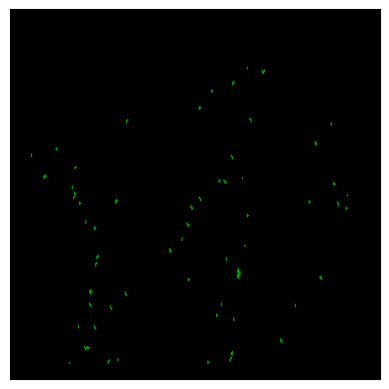

In [198]:
def minutiae_at(pixels, i, j, kernel_size):
    """
    https://airccj.org/CSCP/vol7/csit76809.pdf pg93
    Crossing number methods is a really simple way to detect ridge endings and ridge bifurcations.
    Then the crossing number algorithm will look at 3x3 pixel blocks:

    if middle pixel is black (represents ridge):
    if pixel on boundary are crossed with the ridge once, then it is a possible ridge ending
    if pixel on boundary are crossed with the ridge three times, then it is a ridge bifurcation

    :param pixels:
    :param i:
    :param j:
    :return:
    """
    # if middle pixel is black (represents ridge)
    if pixels[i][j] == 1:

        if kernel_size == 3:
            cells = [(-1, -1), (-1, 0), (-1, 1),        # p1 p2 p3
                   (0, 1),  (1, 1),  (1, 0),            # p8    p4
                  (1, -1), (0, -1), (-1, -1)]           # p7 p6 p5
        else:
            cells = [(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2),                 # p1 p2   p3
                   (-1, 2), (0, 2),  (1, 2),  (2, 2), (2, 1), (2, 0),               # p8      p4
                  (2, -1), (2, -2), (1, -2), (0, -2), (-1, -2), (-2, -2)]           # p7 p6   p5

        values = [pixels[i + l][j + k] for k, l in cells]

        # count crossing how many times it goes from 0 to 1
        crossings = 0
        for k in range(0, len(values)-1):
            crossings += abs(values[k] - values[k + 1])
        crossings //= 2

        # if pixel on boundary are crossed with the ridge once, then it is a possible ridge ending
        # if pixel on boundary are crossed with the ridge three times, then it is a ridge bifurcation
        if crossings == 1:
            return "ending"
        if crossings == 3:
            return "bifurcation"

    return "none"


def calculate_minutiaes(im, kernel_size=3):
    biniry_image = np.zeros_like(im)
    biniry_image[im<10] = 1.0
    biniry_image = biniry_image.astype(np.int8)

    (y, x) = im.shape
    result = cv.cvtColor(im, cv.COLOR_GRAY2RGB)
    colors = {"ending" : (0, 0, 0), "bifurcation" : (0, 150, 0)}

    # iterate each pixel minutia
    for i in range(1, x - kernel_size//2):
        for j in range(1, y - kernel_size//2):
            minutiae = minutiae_at(biniry_image, j, i, kernel_size)
            if minutiae != "none":
                cv.circle(result, (i,j), radius=2, color=colors[minutiae], thickness=2)

    return result

display_image(calculate_minutiaes(binaray_test_gt_set[0]))
